In [1]:
# Replace the entire import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

### cleaning the train dataset

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df.head(10)

,Id,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Sat, 2 Jul 2016 11:02:58 +0530",iiitd,ac.in,4,0,multipart/alternative,0,0,1,0,23,3020,0
1,1,"Sun, 20 Mar 2016 12:05:42 +0530",iiitd,ac.in,9,0,multipart/alternative,0,0,1,0,44,5026,0
2,2,"Tue, 16 Jan 2018 14:46:11 +0000 (UTC)",github,com,1,0,multipart/alternative,2,26,0,0,51,4792,0
3,3,"Sat, 13 Sep 2014 22:36:23 +0000",twitter,com,0,0,multipart/alternative,10,94,0,0,66,47711,1
4,4,"Tue, 26 Sep 2017 13:50:52 +0000 (UTC)",udacity,com,0,0,multipart/alternative,10,40,1,0,53,64317,1
5,5,"Sat, 7 May 2016 03:03:44 +0000",topcoder,com,0,0,multipart/alternative,13,83,0,0,62,86856,1
6,6,"Sun, 17 Apr 2016 14:44:23 +0530",iiitd,ac.in,6,0,multipart/alternative,1,46,1,0,48,15807,0
7,7,"Sat, 14 Feb 2015 11:54:59 +0000 (UTC)",quora,com,0,0,multipart/alternative,0,93,1,0,99,81627,1
8,8,"Sat, 29 Apr 2017 14:59:30 +0530",iiitd,ac.in,2,0,multipart/mixed,0,0,0,0,23,79002,0
9,9,"Wed, 9 Mar 2016 09:10:46 +0530",iiitd,ac.in,0,0,multipart/alternative,0,4,1,0,39,3686,0


In [4]:
test_df.head(10)

,Id,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,"Thu, 28 Feb 2019 17:54:25 +0000",centralesupelec,fr,0,0,multipart/alternative,0,3,1,0,139,10544
1,1,"Tue, 28 Nov 2017 04:22:14 +0000",oneplusstore,in,0,0,multipart/alternative,9,42,0,0,56,44178
2,2,"Tue, 11 Jul 2017 13:50:54 +0200 (CEST)",entertainment,bookmyshow.com,0,0,text/html,17,41,0,0,37,24599
3,3,"Tue, 12 Apr 2016 12:48:18 +0530",rs-components,co.in,0,0,multipart/alternative,15,45,0,0,38,10774
4,4,"Thu, 10 Aug 2017 05:31:30 -0700",youtube,com,0,0,multipart/alternative,30,139,1,0,101,81760
5,5,"Fri, 8 Dec 2017 15:17:23 +0530",iiitd,ac.in,0,0,multipart/related,0,0,1,0,25,1859253
6,6,"Tue, 1 Aug 2017 17:37:58 -0400 (EDT)",edx,org,0,0,multipart/alternative,24,83,0,0,34,88595
7,7,"Thu, 30 Jul 2015 01:39:50 +0000",youtube,com,0,0,multipart/alternative,17,61,0,0,93,44903
8,8,"Thu, 28 Jan 2016 04:50:41 +0000",usebackpack,com,0,0,multipart/alternative,4,19,0,0,36,27395
9,9,"Thu, 4 Aug 2016 08:09:32 +0530",iiitd,ac.in,3,0,multipart/alternative,0,0,1,0,19,971


### 1.1 Check for train Missing Values

In [5]:
missing_values = df.isnull().sum()
missing_values

Id                    0
date                  0
org                 114
tld                 114
ccs                   0
bcced                 0
mail_type             0
images                0
urls                  0
salutations           0
designation           0
chars_in_subject      0
chars_in_body         0
label                 0
dtype: int64

In [6]:
df['date_cleaned'] = df['date'].str.replace(r"\s+\([A-Za-z]+\)", "", regex=True)

In [7]:
df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format='mixed', errors='coerce', utc = 'True')

In [8]:
df['Year'] = df['date_cleaned'].dt.year
df['Month'] = df['date_cleaned'].dt.month
df['Day'] = df['date_cleaned'].dt.day
df['Hour'] = df['date_cleaned'].dt.hour
df['DayOfWeek'] = df['date_cleaned'].dt.dayofweek  # Monday=0, tuesday=1 Sunday=6

In [9]:
df = df.drop(columns=['date'])
df = df.drop(columns=['date_cleaned'])

In [10]:
test_df['date_cleaned'] = test_df['date'].str.replace(r"\s+\([A-Za-z]+\)", "", regex=True)

In [11]:
test_df['date_cleaned'] = pd.to_datetime(test_df['date_cleaned'], format='mixed', errors='coerce', utc = 'True')

In [12]:
test_df['Year'] = test_df['date_cleaned'].dt.year
test_df['Month'] = test_df['date_cleaned'].dt.month
test_df['Day'] = test_df['date_cleaned'].dt.day
test_df['Hour'] = test_df['date_cleaned'].dt.hour
test_df['DayOfWeek'] = test_df['date_cleaned'].dt.dayofweek  # Monday=0, Sunday=6

In [13]:
test_df = test_df.drop(columns=['date'])
test_df = test_df.drop(columns=['date_cleaned'])

In [14]:
num_cols = df.select_dtypes(include="number")

number_columns = num_cols.columns

In [15]:
no_of_num_cols = len(number_columns)
no_of_num_cols

15

In [16]:
print(f"Number of columns: {len(number_columns)}")
print(f"Columns: {number_columns.tolist()}")

Number of columns: 15
Columns: ['Id', 'ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body', 'label', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']


In [17]:
rows = math.ceil(no_of_num_cols / 3)
rows

5

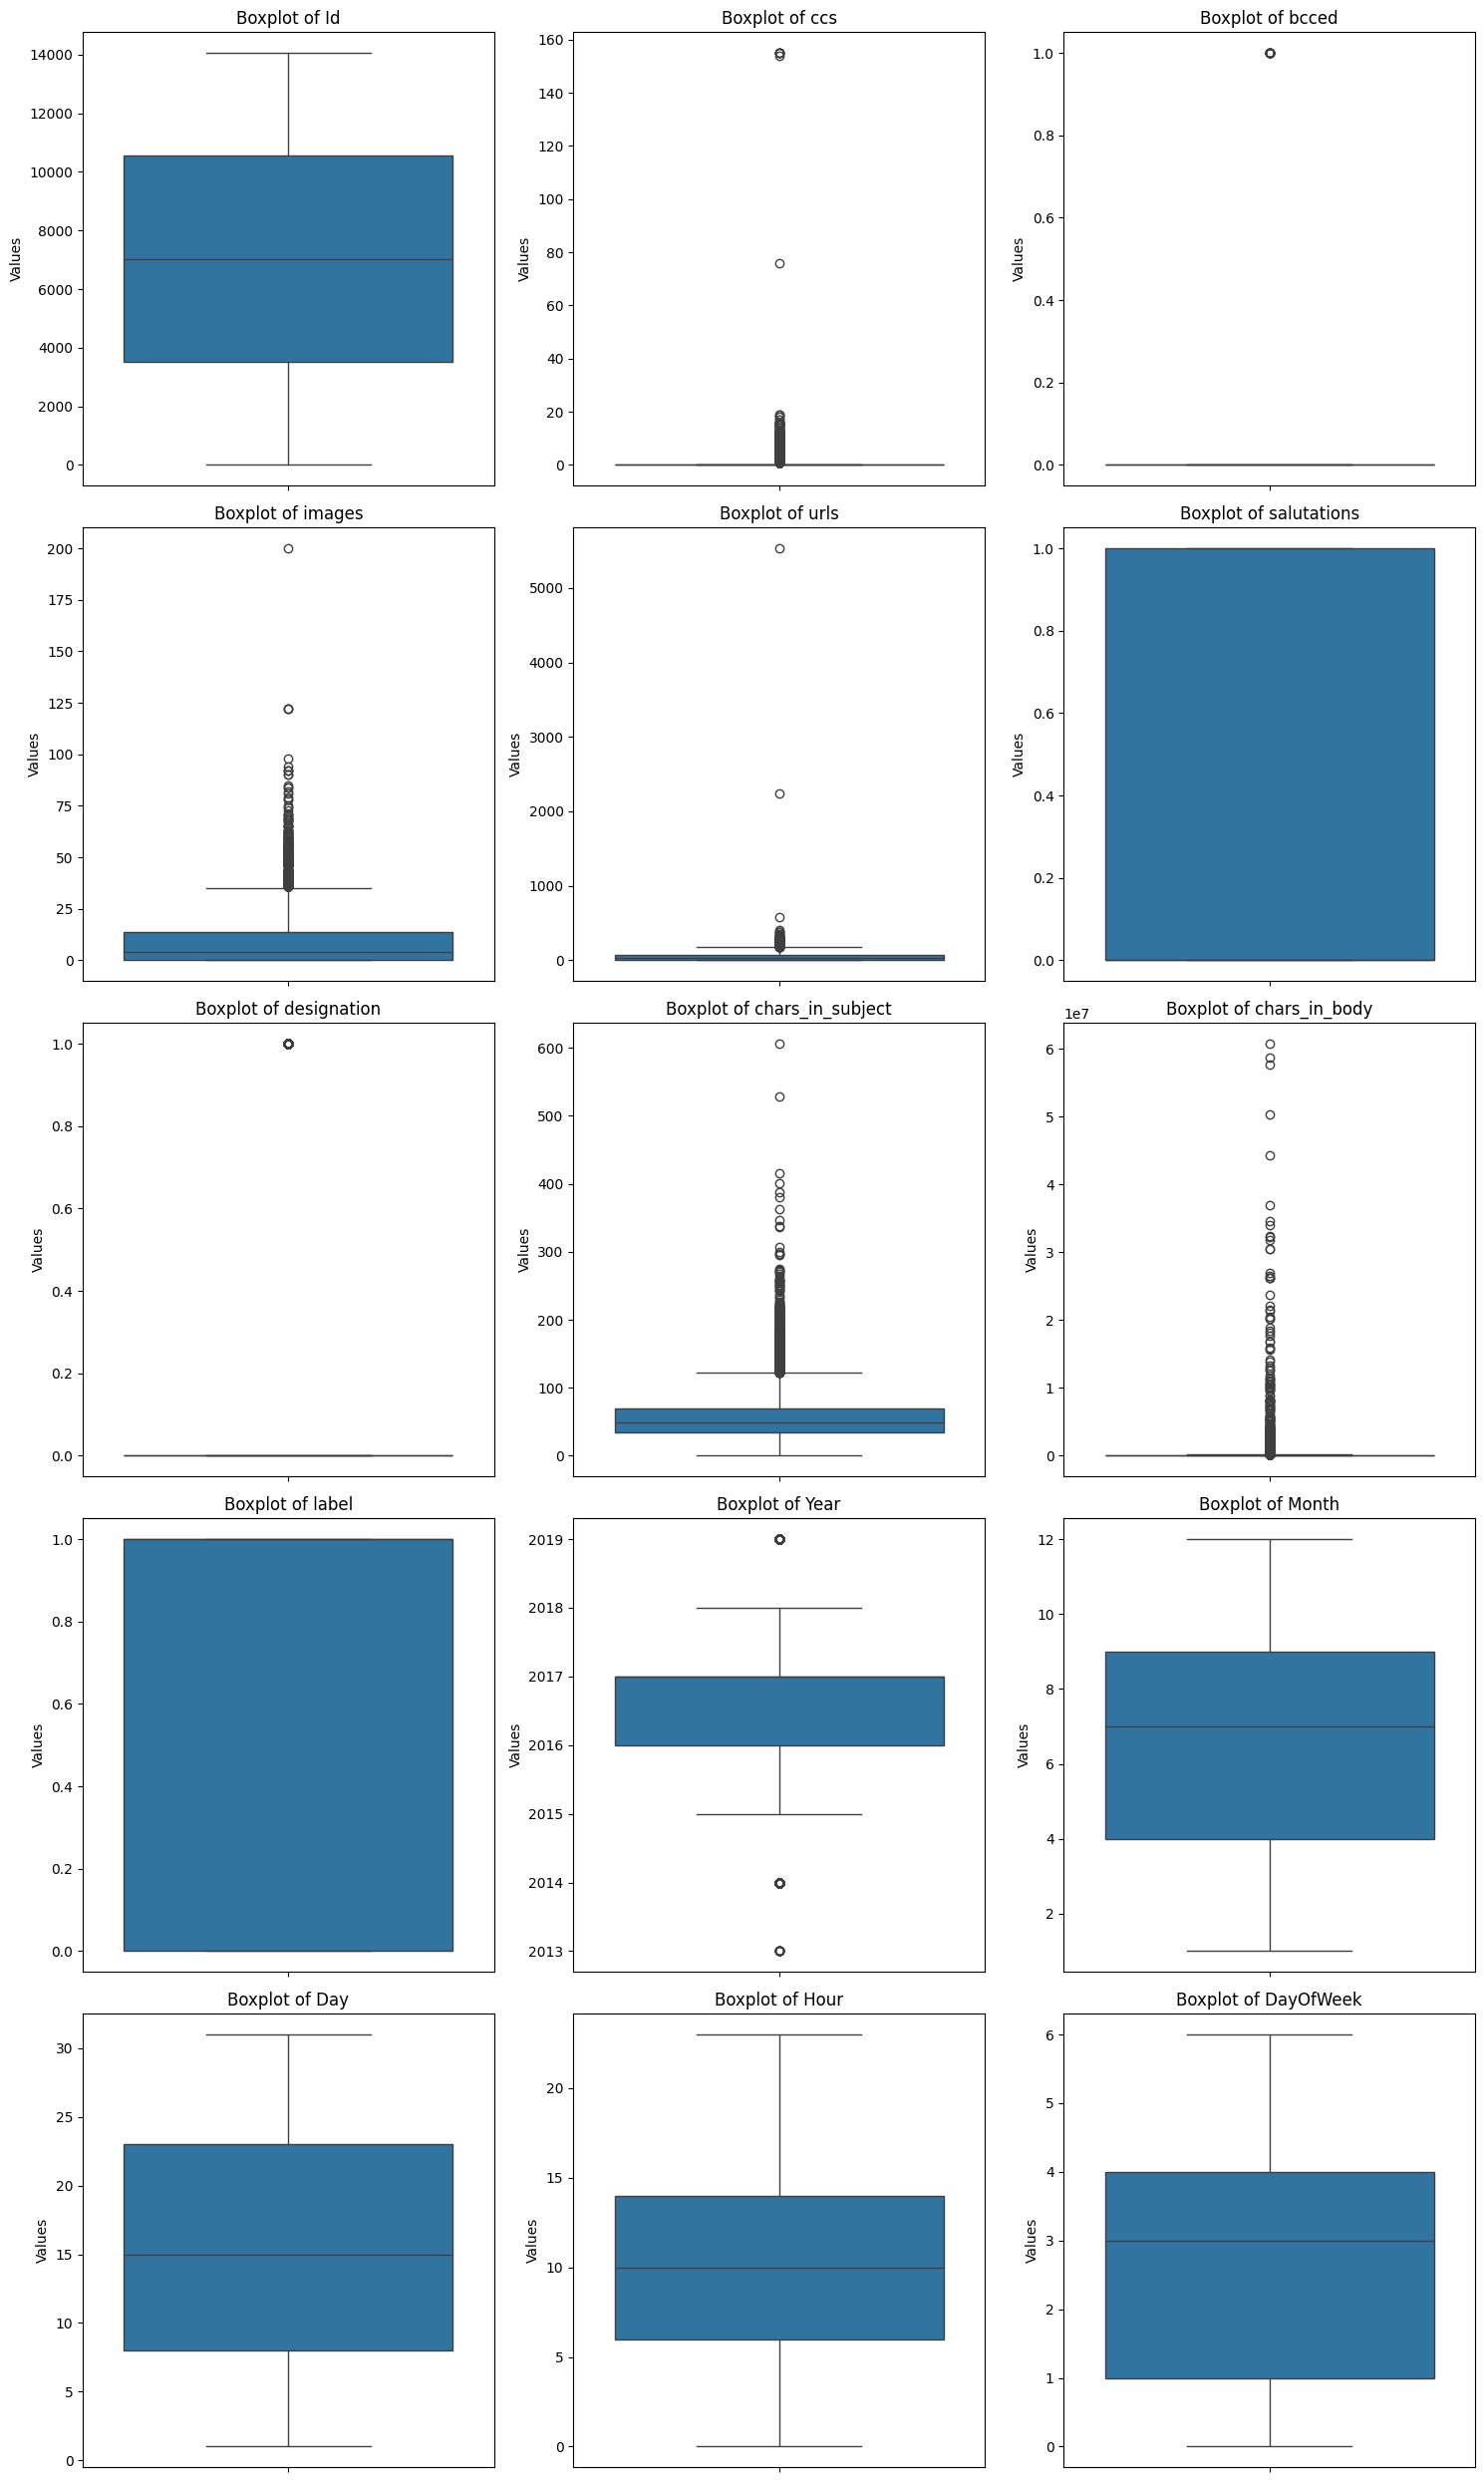

In [18]:
plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(number_columns.tolist()):
    plt.subplot(rows,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [19]:
test_missing_values = test_df.isnull().sum()
test_missing_values

Id                   0
org                 48
tld                 48
ccs                  0
bcced                0
mail_type            0
images               0
urls                 0
salutations          0
designation          0
chars_in_subject     0
chars_in_body        0
Year                 0
Month                0
Day                  0
Hour                 0
DayOfWeek            0
dtype: int64

In [20]:
num_cols_test = test_df.select_dtypes(include="number")

number_columns_test = num_cols_test.columns

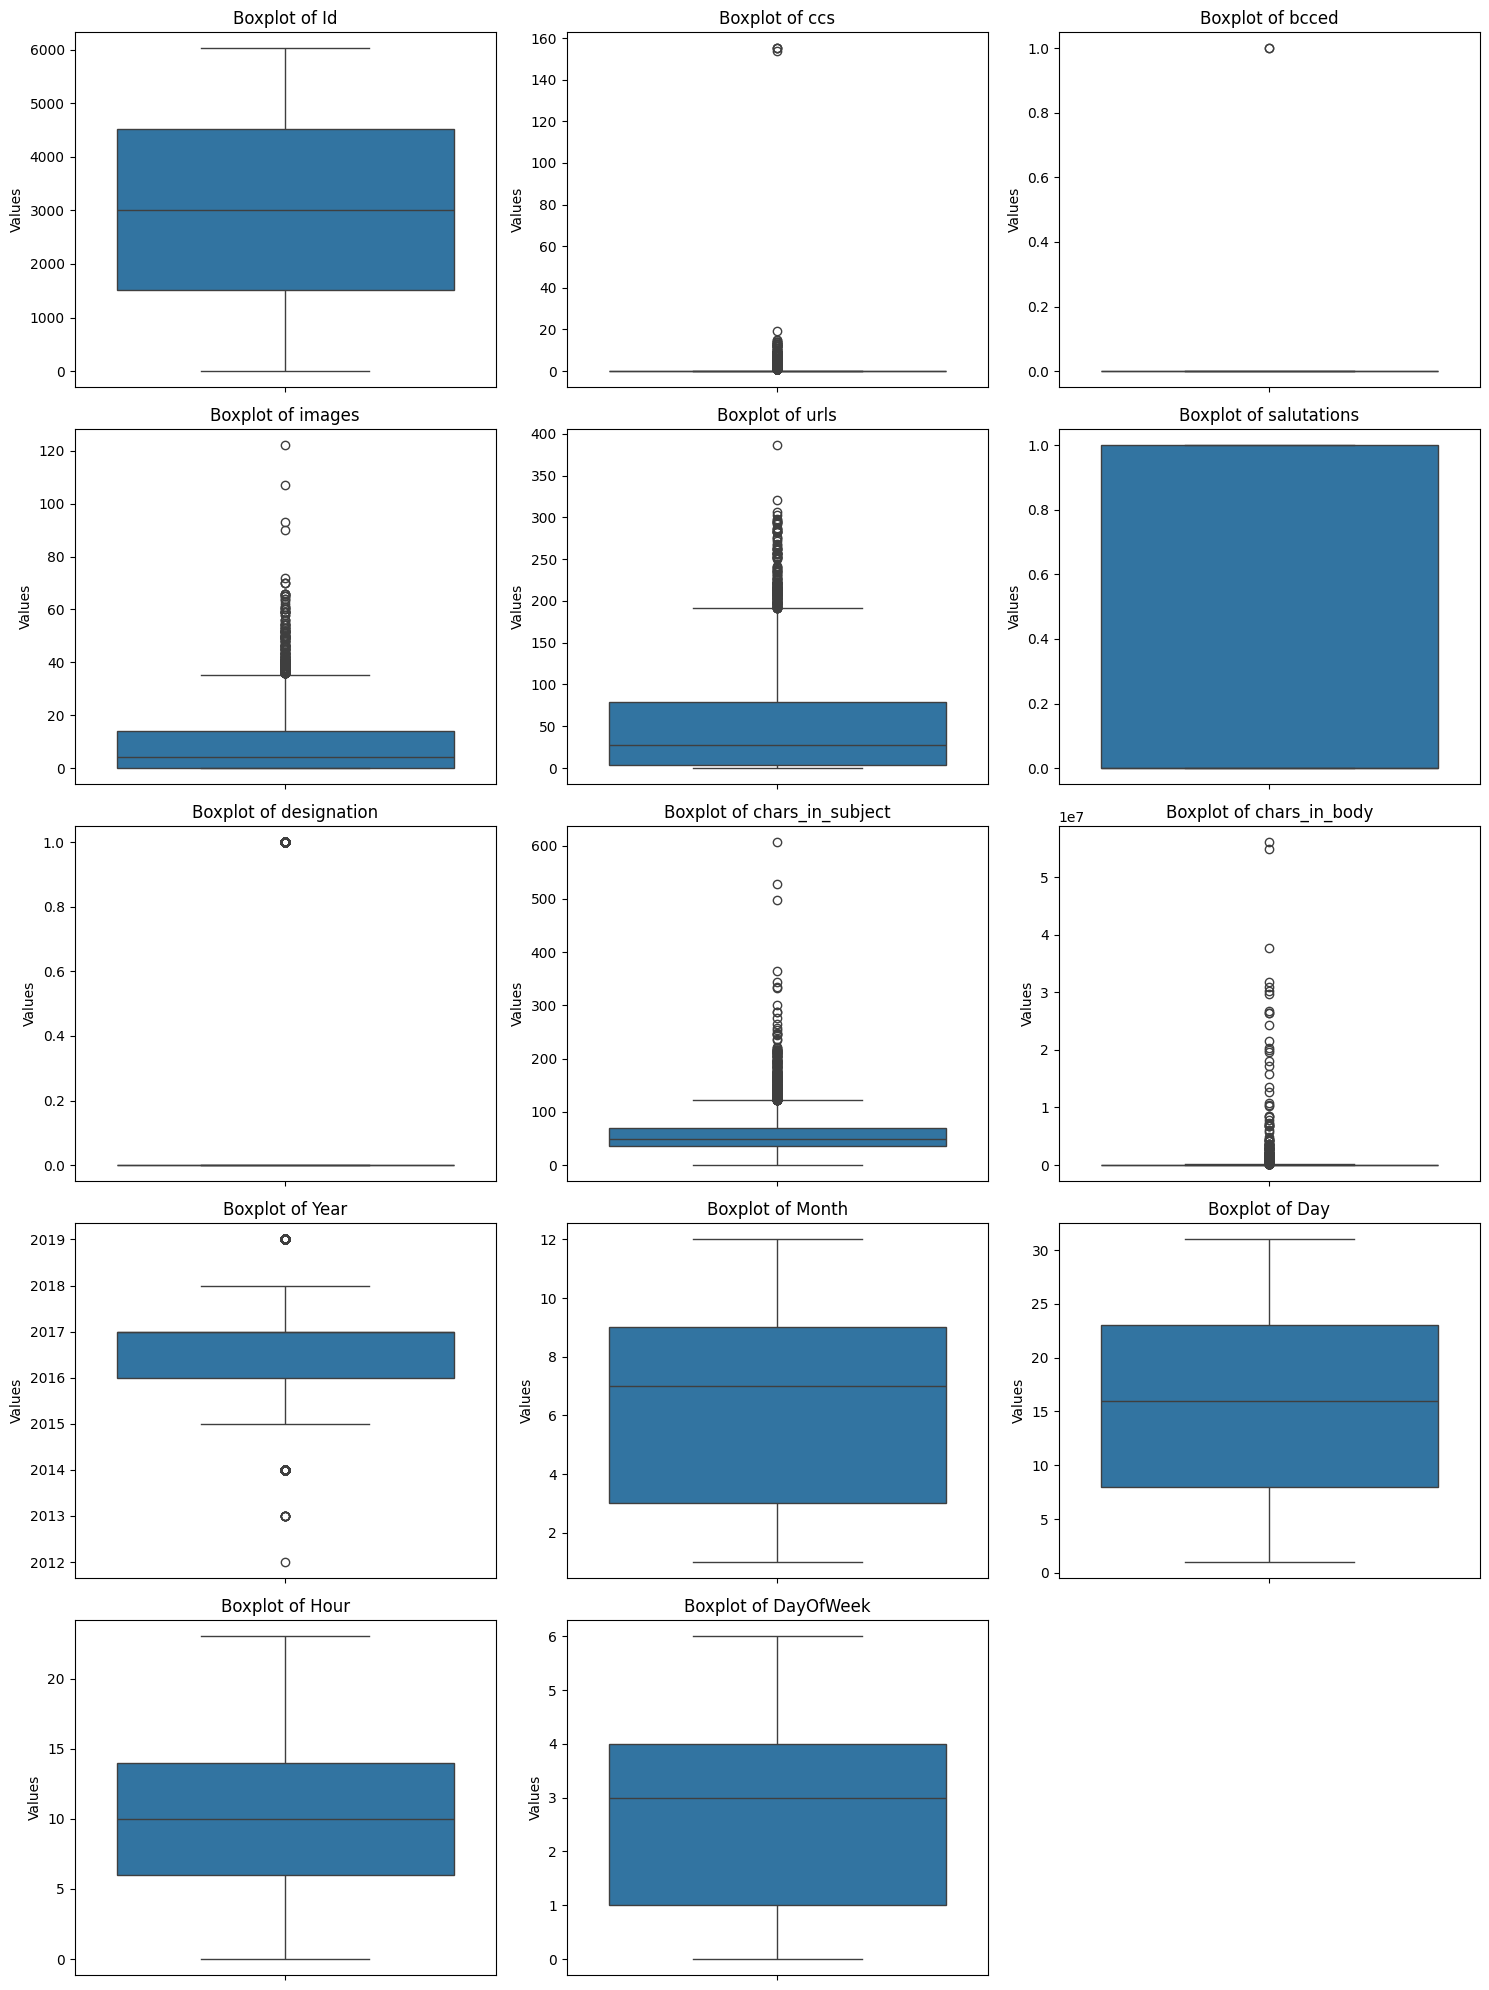

In [21]:

rows_test = math.ceil(len(number_columns_test) / 3)


plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(number_columns_test.tolist()):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(y=test_df[col])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('Values', fontsize=10)
plt.tight_layout()
plt.show()

### 1.2 Handle Missing Data

- **Fill missing numerical values with the median.**

In [22]:
df[number_columns] = df[number_columns].fillna(df[number_columns].median())

- **Fill missing categorical values with the mode.**

In [23]:
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

### 1.3 Verify

In [24]:
df.isnull().sum()

Id                  0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
label               0
Year                0
Month               0
Day                 0
Hour                0
DayOfWeek           0
dtype: int64

In [25]:
test_df[number_columns_test] = test_df[number_columns_test].fillna(df[number_columns_test].median())

In [26]:
cat_cols_test = df.select_dtypes(include=["object"]).columns
test_df[cat_cols_test] = test_df[cat_cols_test].apply(lambda x: x.fillna(x.mode()[0]))

In [27]:
test_missing_values = test_df.isnull().sum()
test_missing_values

Id                  0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
Year                0
Month               0
Day                 0
Hour                0
DayOfWeek           0
dtype: int64

##### as we can see no more missing values

### 2.1 Detecting Outliers Using the IQR Method

In [28]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Id: 0
Count of outliers in ccs: 2907
Count of outliers in bcced: 30
Count of outliers in images: 578
Count of outliers in urls: 453
Count of outliers in salutations: 0
Count of outliers in designation: 1862
Count of outliers in chars_in_subject: 698
Count of outliers in chars_in_body: 827
Count of outliers in label: 0
Count of outliers in Year: 1202
Count of outliers in Month: 0
Count of outliers in Day: 0
Count of outliers in Hour: 0
Count of outliers in DayOfWeek: 0


In [29]:

for col in number_columns_test:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Id: 0
Count of outliers in ccs: 1242
Count of outliers in bcced: 2
Count of outliers in images: 251
Count of outliers in urls: 195
Count of outliers in salutations: 0
Count of outliers in designation: 778
Count of outliers in chars_in_subject: 340
Count of outliers in chars_in_body: 332
Count of outliers in Year: 523
Count of outliers in Month: 0
Count of outliers in Day: 0
Count of outliers in Hour: 0
Count of outliers in DayOfWeek: 0


### 2.2 Handling Outliers

In [30]:
df['ccs'] = np.log1p(df['ccs'])

In [31]:
df['ccs'].describe()

count    14064.000000
mean         0.254900
std          0.553829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.049856
Name: ccs, dtype: float64

In [32]:
min_year = df['Year'].min()
df['Year'] = df['Year'] - min_year

In [33]:
num_cols = df.select_dtypes(include='number').drop('ccs', axis=1)
number_columns = num_cols.columns

- **Capping (Winsorization): Replace extreme values with the nearest non-outlier values.**

In [34]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

### 2.3 Verifying

In [35]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Id: 0
Count of outliers in bcced: 0
Count of outliers in images: 0
Count of outliers in urls: 0
Count of outliers in salutations: 0
Count of outliers in designation: 0
Count of outliers in chars_in_subject: 0
Count of outliers in chars_in_body: 0
Count of outliers in label: 0
Count of outliers in Year: 0
Count of outliers in Month: 0
Count of outliers in Day: 0
Count of outliers in Hour: 0
Count of outliers in DayOfWeek: 0


##### as we can see no more outliers

### 2.4 Verifying using graph

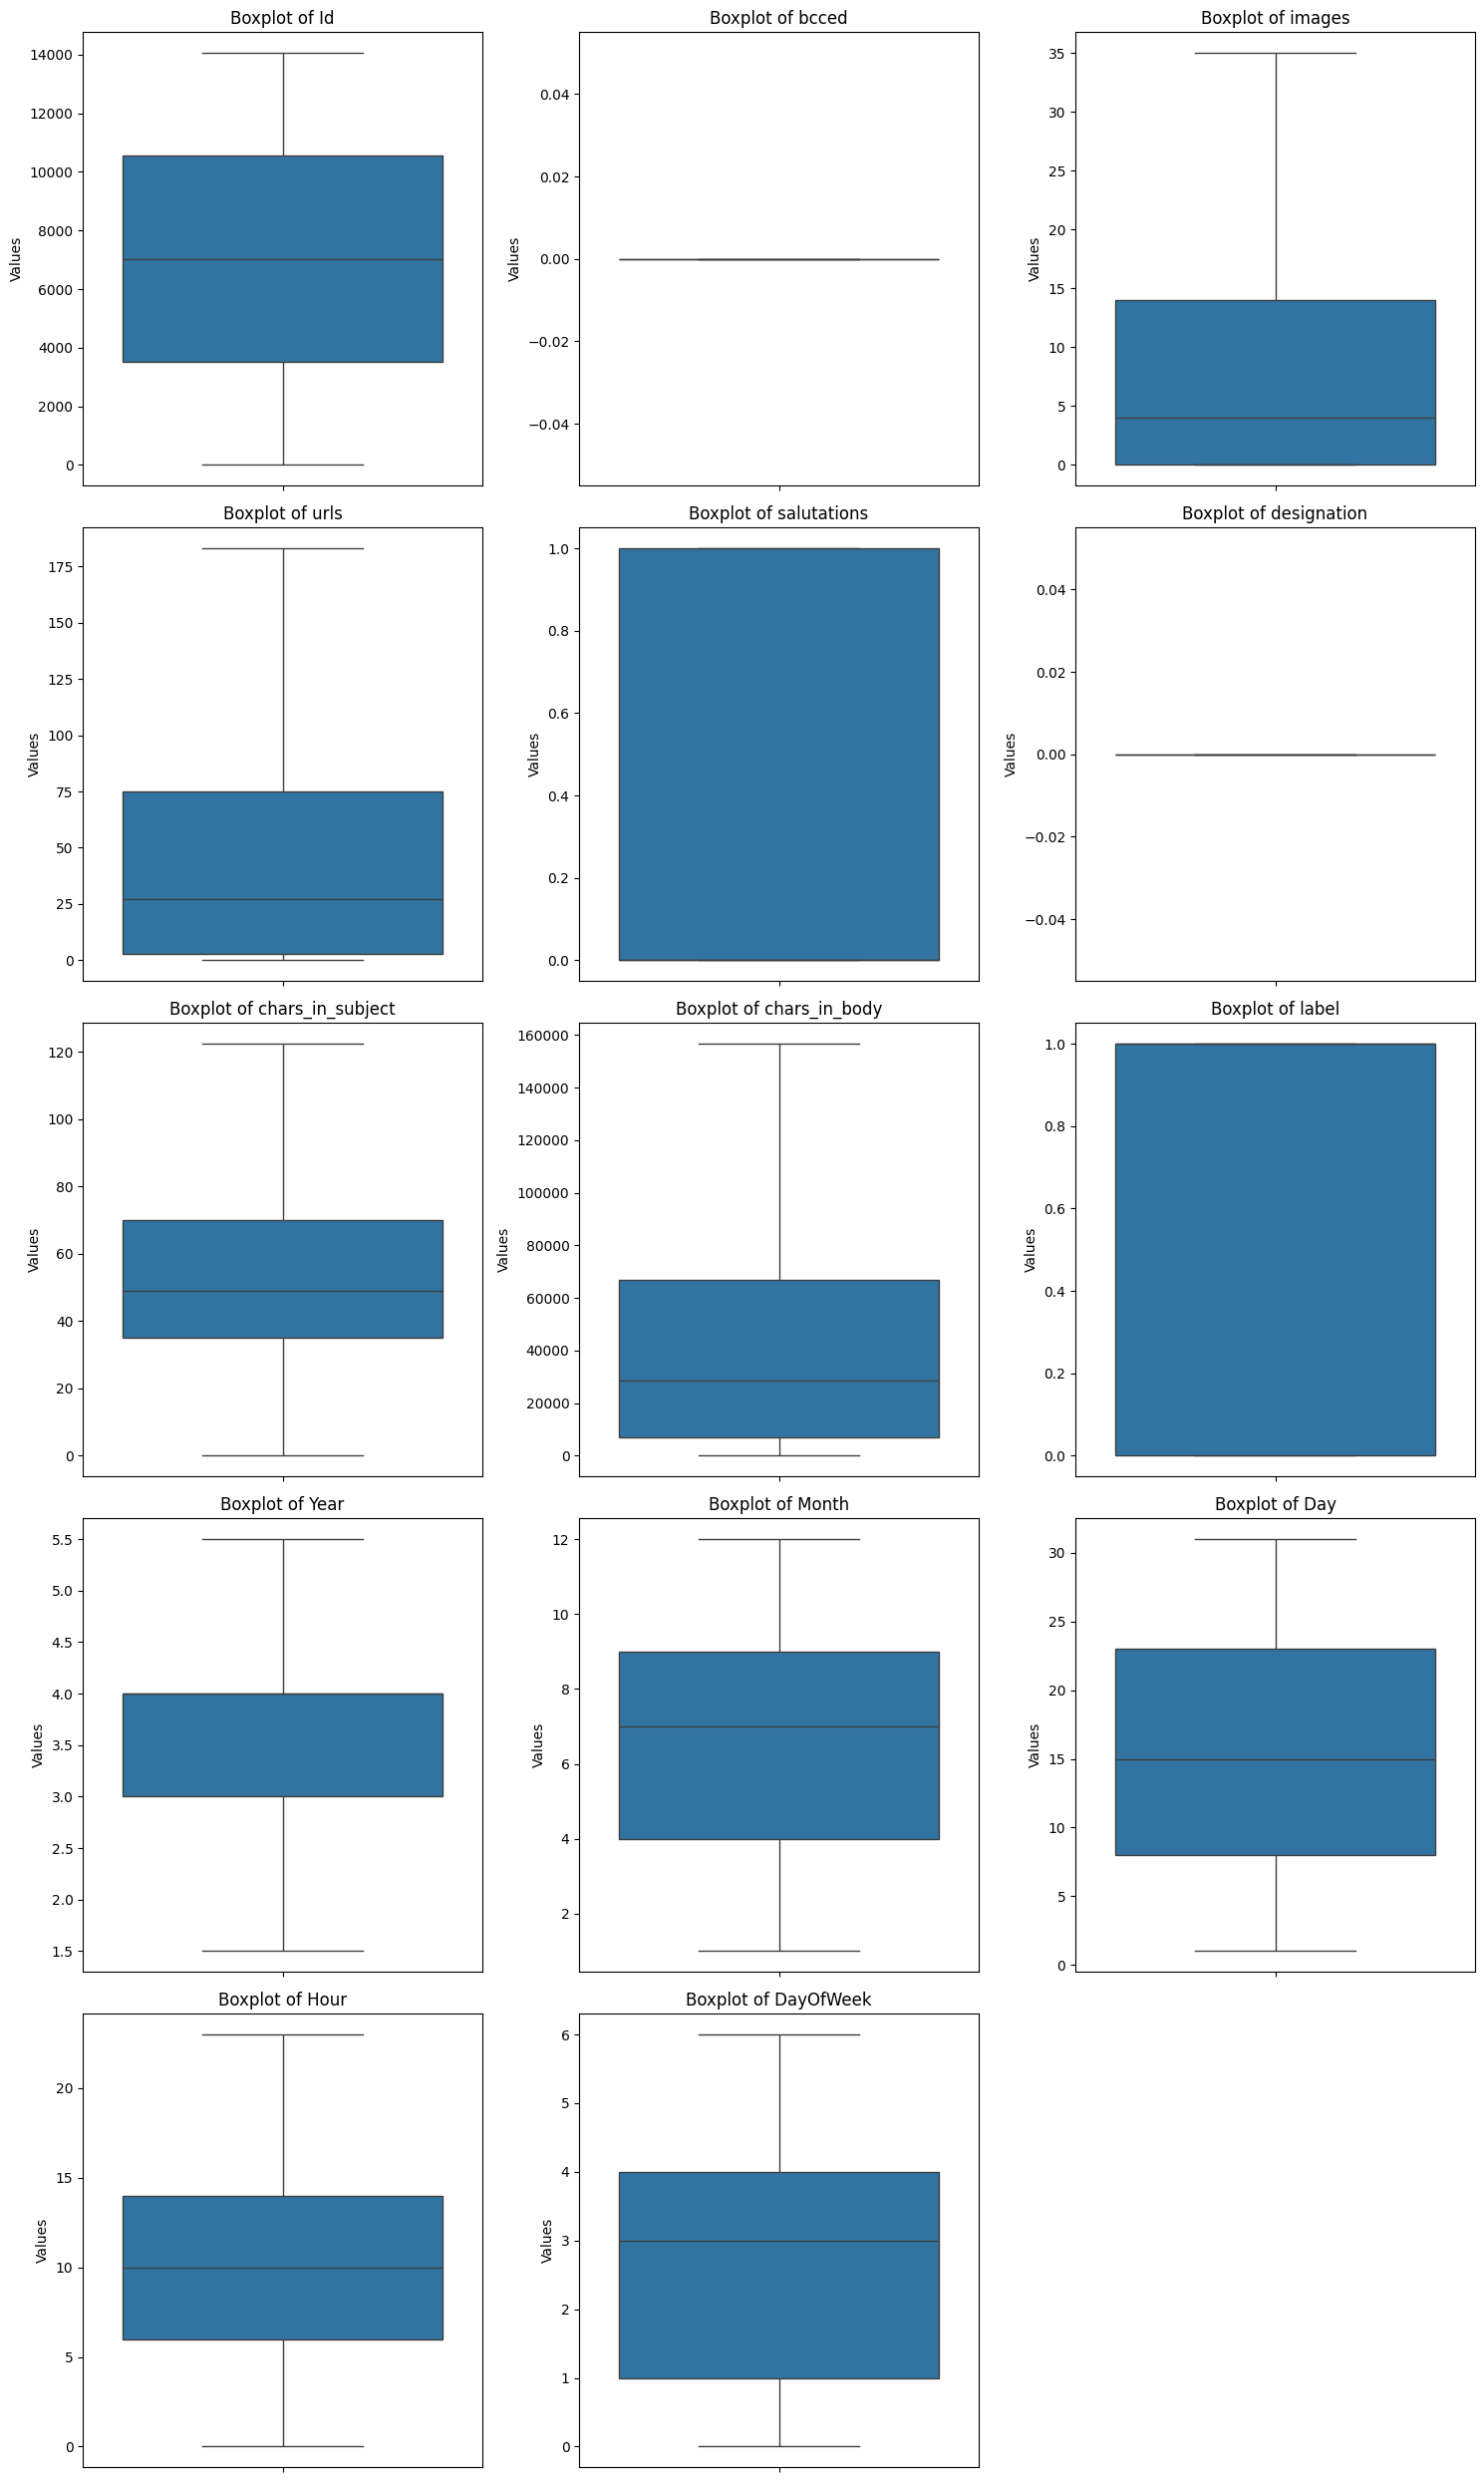

In [36]:
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(number_columns):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [37]:
for col in number_columns_test:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test_df[col] = np.where(test_df[col] < lower_bound, lower_bound, test_df[col])
    test_df[col] = np.where(test_df[col] > upper_bound, upper_bound, test_df[col])

In [38]:
for col in number_columns_test:
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Id: 0
Count of outliers in ccs: 0
Count of outliers in bcced: 0
Count of outliers in images: 0
Count of outliers in urls: 0
Count of outliers in salutations: 0
Count of outliers in designation: 0
Count of outliers in chars_in_subject: 0
Count of outliers in chars_in_body: 0
Count of outliers in Year: 0
Count of outliers in Month: 0
Count of outliers in Day: 0
Count of outliers in Hour: 0
Count of outliers in DayOfWeek: 0


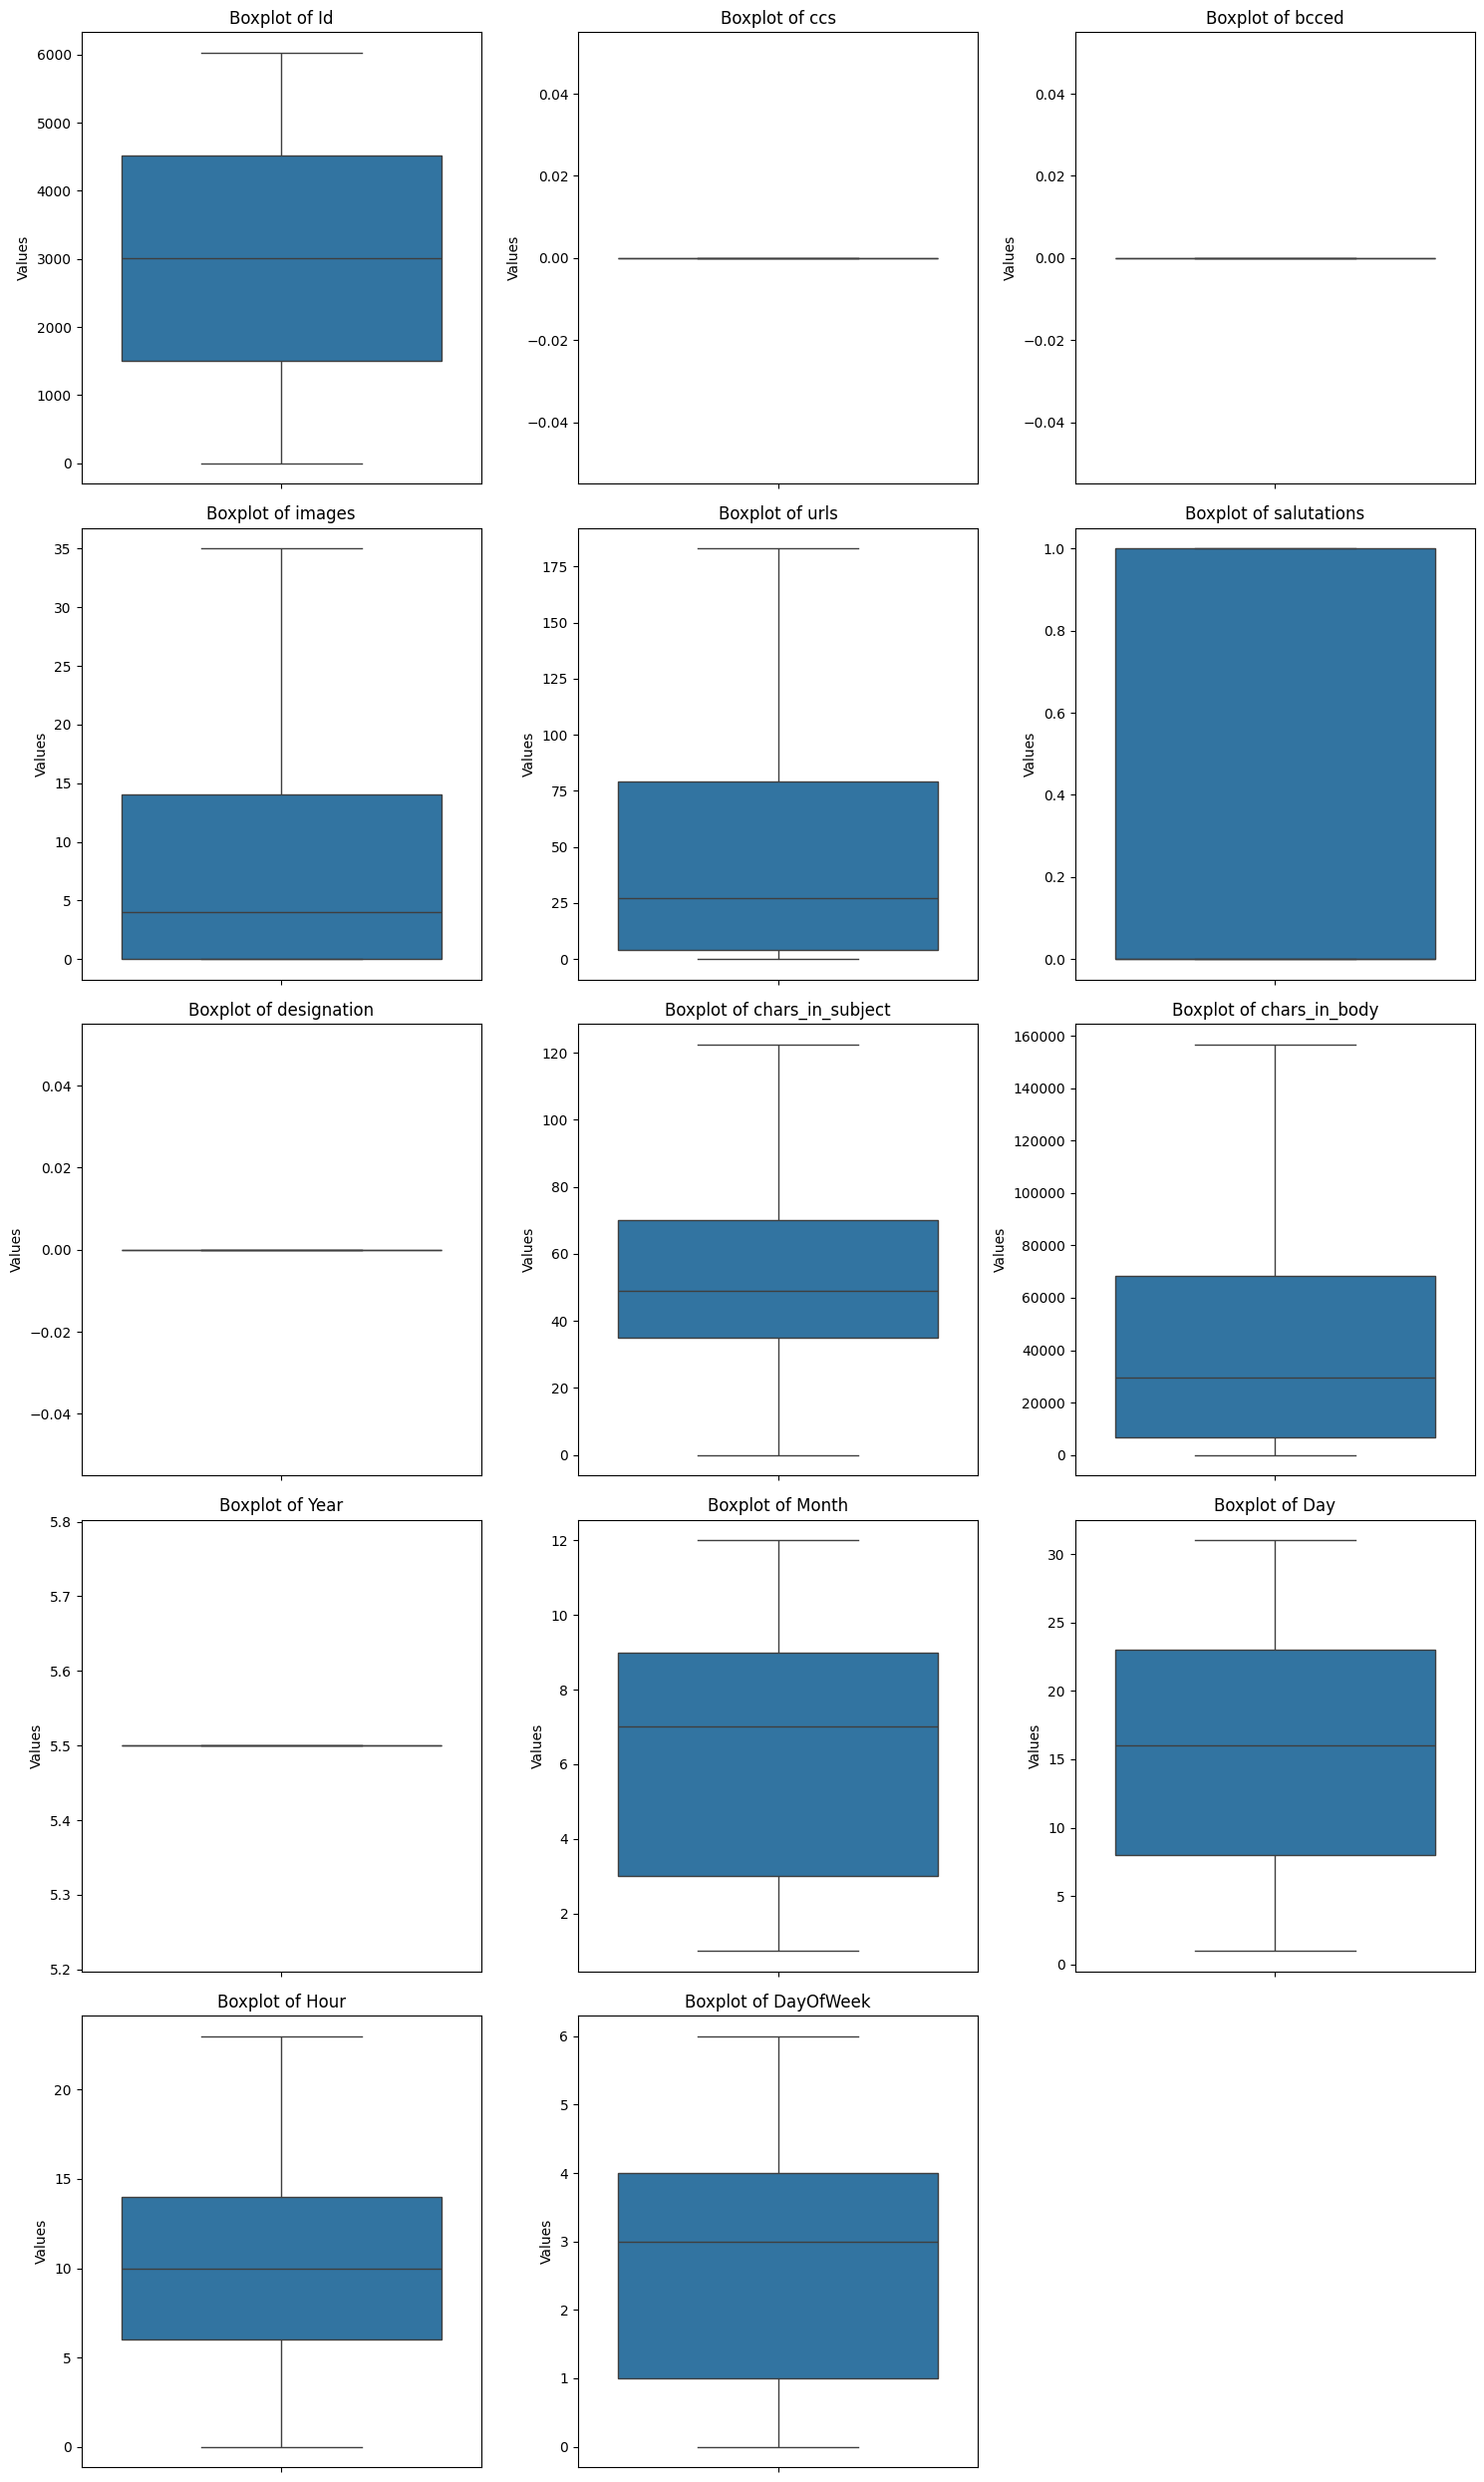

In [39]:
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols_test[:10]):
    plt.subplot(rows_test, 3, i+1)
    sns.boxplot(y=test_df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

## Normalization

In [40]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler


X = df.drop('label', axis=1)
y = df['label']
numerical_cols = [col for col in X.select_dtypes(include=['number']).columns if col != 'Id']


numerical_cols = [col for col in numerical_cols if X[col].nunique() > 2]


exclude_from_scaling = ['bcced', 'designation', 'salutations', 'ccs']
numerical_cols_to_transform = [
    col for col in numerical_cols if col not in exclude_from_scaling and X[col].std() > 1e-6
]


for col in numerical_cols_to_transform:
    test_df[col] = test_df[col].clip(lower=X[col].min(), upper=X[col].max())


pt = PowerTransformer(method='yeo-johnson')
X_power = pt.fit_transform(X[numerical_cols_to_transform])
test_power = pt.transform(test_df[numerical_cols_to_transform])

X_power_df = pd.DataFrame(X_power, columns=numerical_cols_to_transform, index=X.index)
test_power_df = pd.DataFrame(test_power, columns=numerical_cols_to_transform, index=test_df.index)


for col in exclude_from_scaling:
    if col in X.columns:
        X_power_df[col] = X[col]
    if col in test_df.columns:
        test_power_df[col] = test_df[col]


skewness = X_power_df[numerical_cols_to_transform].skew()
z_score = skewness[(skewness >= -0.5) & (skewness <= 0.5)].index
min_max = skewness[(skewness < -0.5) | (skewness > 0.5)].index

In [41]:

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_norm = X_power_df.copy()
test_norm = test_power_df.copy()

if len(min_max) > 0:
    X_norm[min_max] = min_max_scaler.fit_transform(X_power_df[min_max])
    test_norm[min_max] = min_max_scaler.transform(test_power_df[min_max])

if len(z_score) > 0:
    X_norm[z_score] = standard_scaler.fit_transform(X_power_df[z_score])
    test_norm[z_score] = standard_scaler.transform(test_power_df[z_score])

categorical_cols = X.select_dtypes(include=['object']).columns
X_norm[categorical_cols] = X[categorical_cols]
test_norm[categorical_cols] = test_df[categorical_cols]

print("Training Set After Normalization:\n", X_norm[numerical_cols].describe())
print("\nTest Set After Normalization:\n", test_norm[numerical_cols].describe())
print("\nMean and Std Comparison:\n", pd.DataFrame({
    'Train Mean': X_norm[numerical_cols].mean(),
    'Test Mean': test_norm[numerical_cols].mean(),
    'Train Std': X_norm[numerical_cols].std(),
    'Test Std': test_norm[numerical_cols].std()
}))

Training Set After Normalization:
                 ccs        images          urls  chars_in_subject  \
count  14064.000000  1.406400e+04  1.406400e+04      1.406400e+04   
mean       0.254900  4.546988e-18  3.536547e-17     -1.869317e-17   
std        0.553829  1.000036e+00  1.000036e+00      1.000036e+00   
min        0.000000 -1.191355e+00 -1.508590e+00     -4.510545e+00   
25%        0.000000 -1.191355e+00 -9.711283e-01     -6.785235e-01   
50%        0.000000  5.902015e-02  1.023373e-01     -7.292614e-02   
75%        0.000000  8.952824e-01  8.485319e-01      6.436346e-01   
max        5.049856  1.551845e+00  1.653133e+00      1.941880e+00   

       chars_in_body          Year         Month           Day          Hour  \
count   1.406400e+04  1.406400e+04  1.406400e+04  1.406400e+04  1.406400e+04   
mean    2.197711e-17 -6.567872e-18  1.212530e-17 -1.212530e-17  2.576627e-17   
std     1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min    -2.159307e+00 -1

### plotting both train and test before and after normalizing

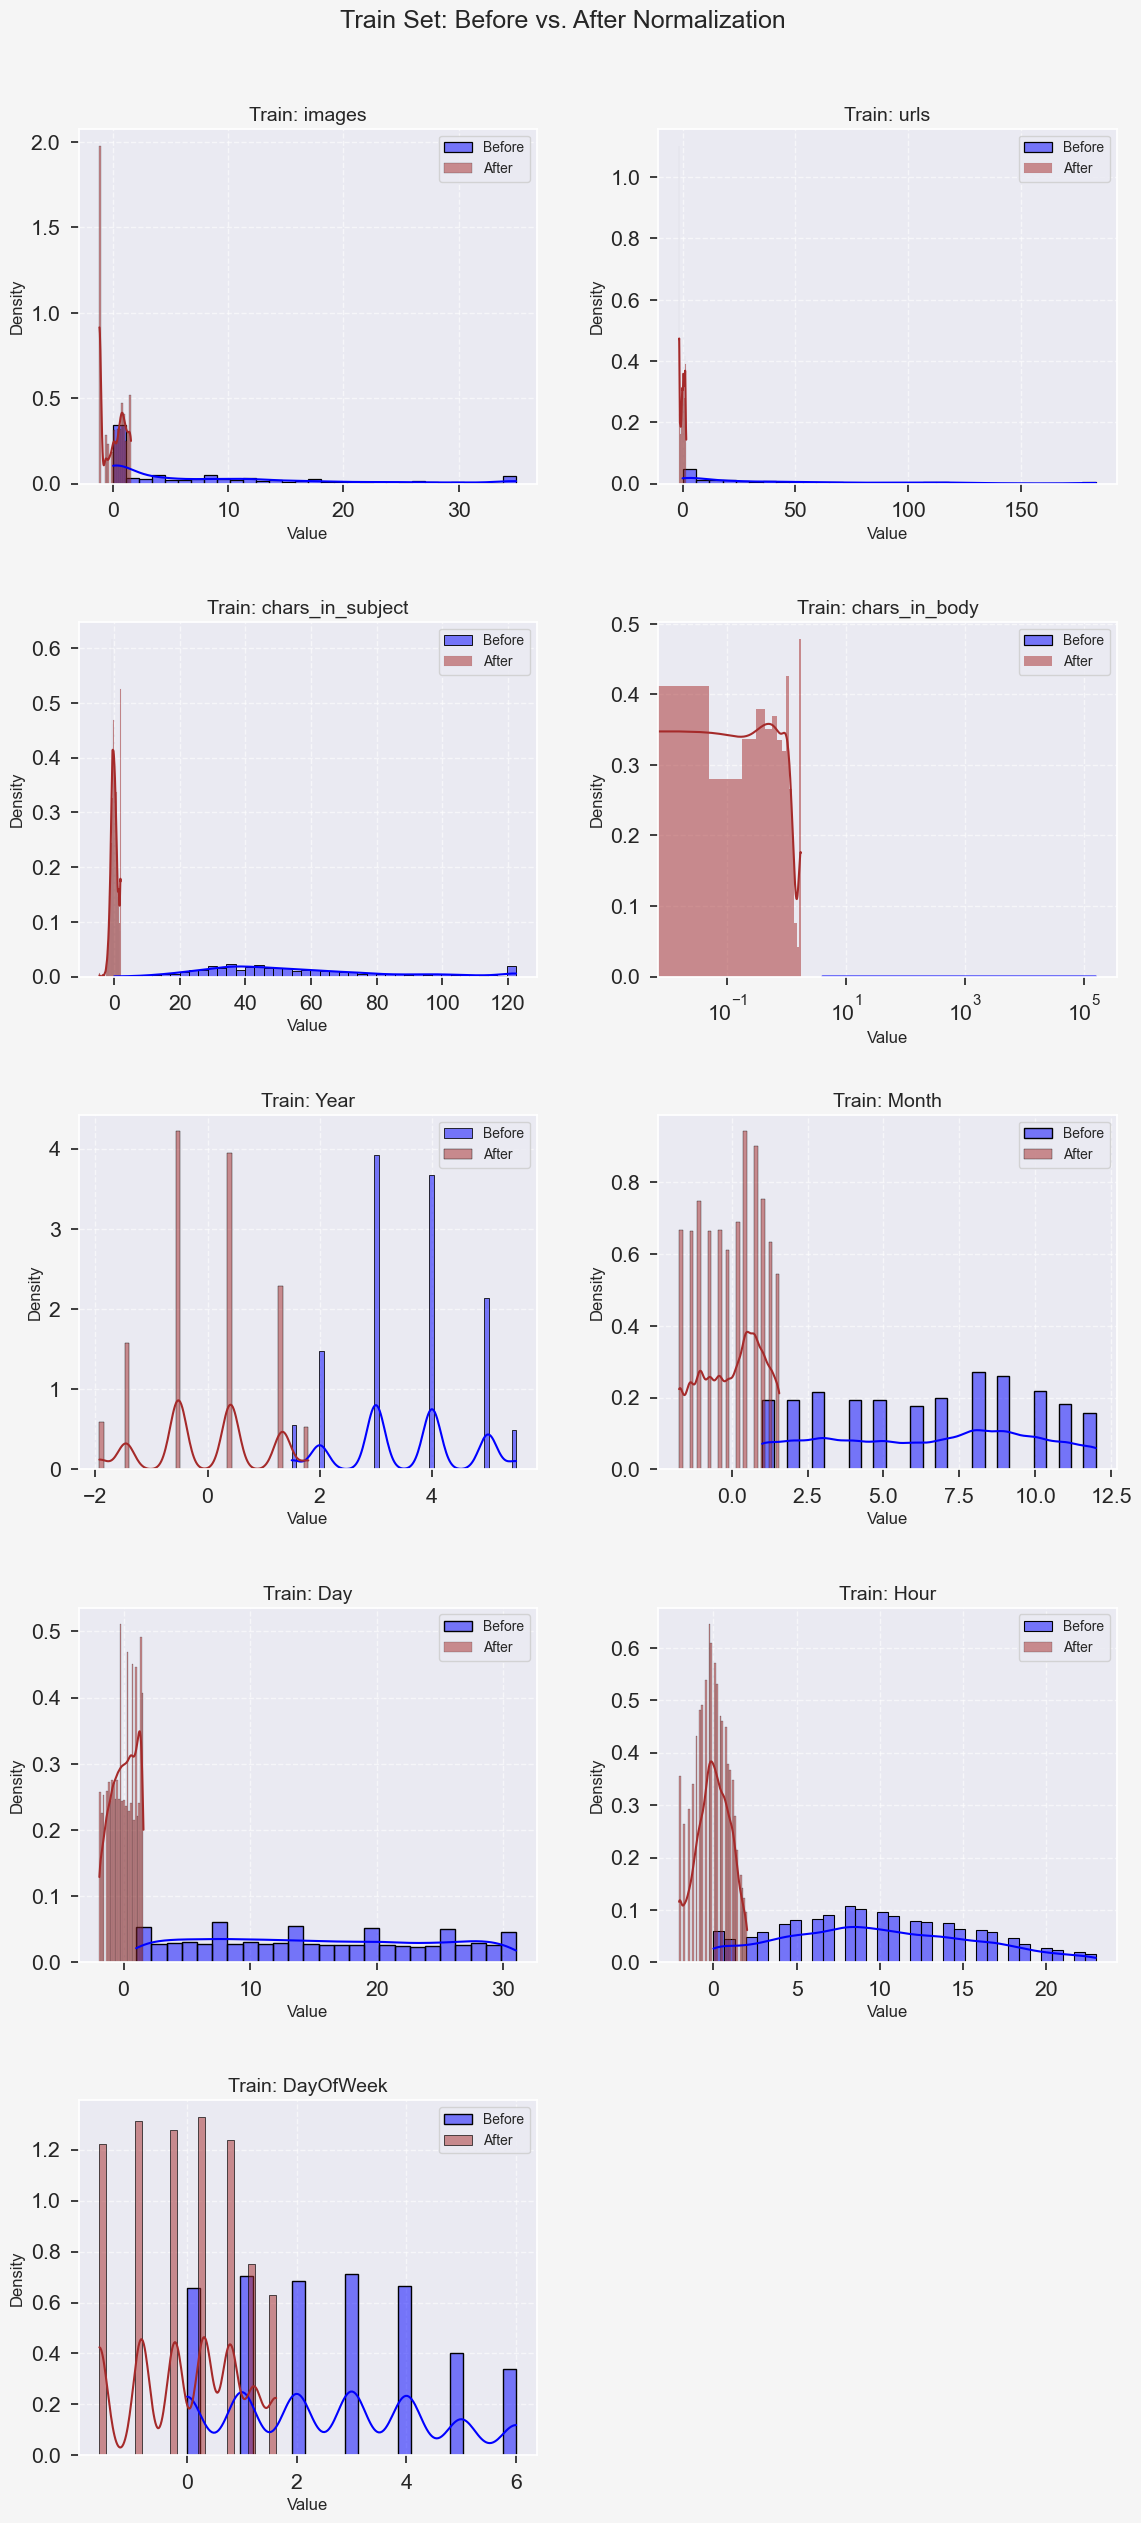

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


plot_cols = numerical_cols_to_transform
bin_ranges = {}
for col in plot_cols:
    raw_min = min(X[col].min(), test_df[col].min())
    raw_max = max(X[col].max(), test_df[col].max())
    bin_ranges[col] = (raw_min, raw_max)

cols = 2
rows = math.ceil(len(plot_cols) / cols)
figsize = (12, rows * 5)
plt.style.use('seaborn-v0_8')
sns.set_context('notebook', font_scale=1.4)

plt.figure(figsize=figsize, facecolor='#f5f5f5')
for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X[col], label="Before", kde=True, color='blue', alpha=0.5, stat='density', binrange=bin_ranges[col])
    sns.histplot(X_norm[col], label="After", kde=True, color='brown', alpha=0.5, stat='density')  # Fixed quote
    plt.title(f"Train: {col}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(frameon=True, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    if X[col].max() > 1000:
        plt.xscale('log')
plt.tight_layout(pad=2)
plt.suptitle("Train Set: Before vs. After Normalization", fontsize=18, y=1.02)
plt.show()

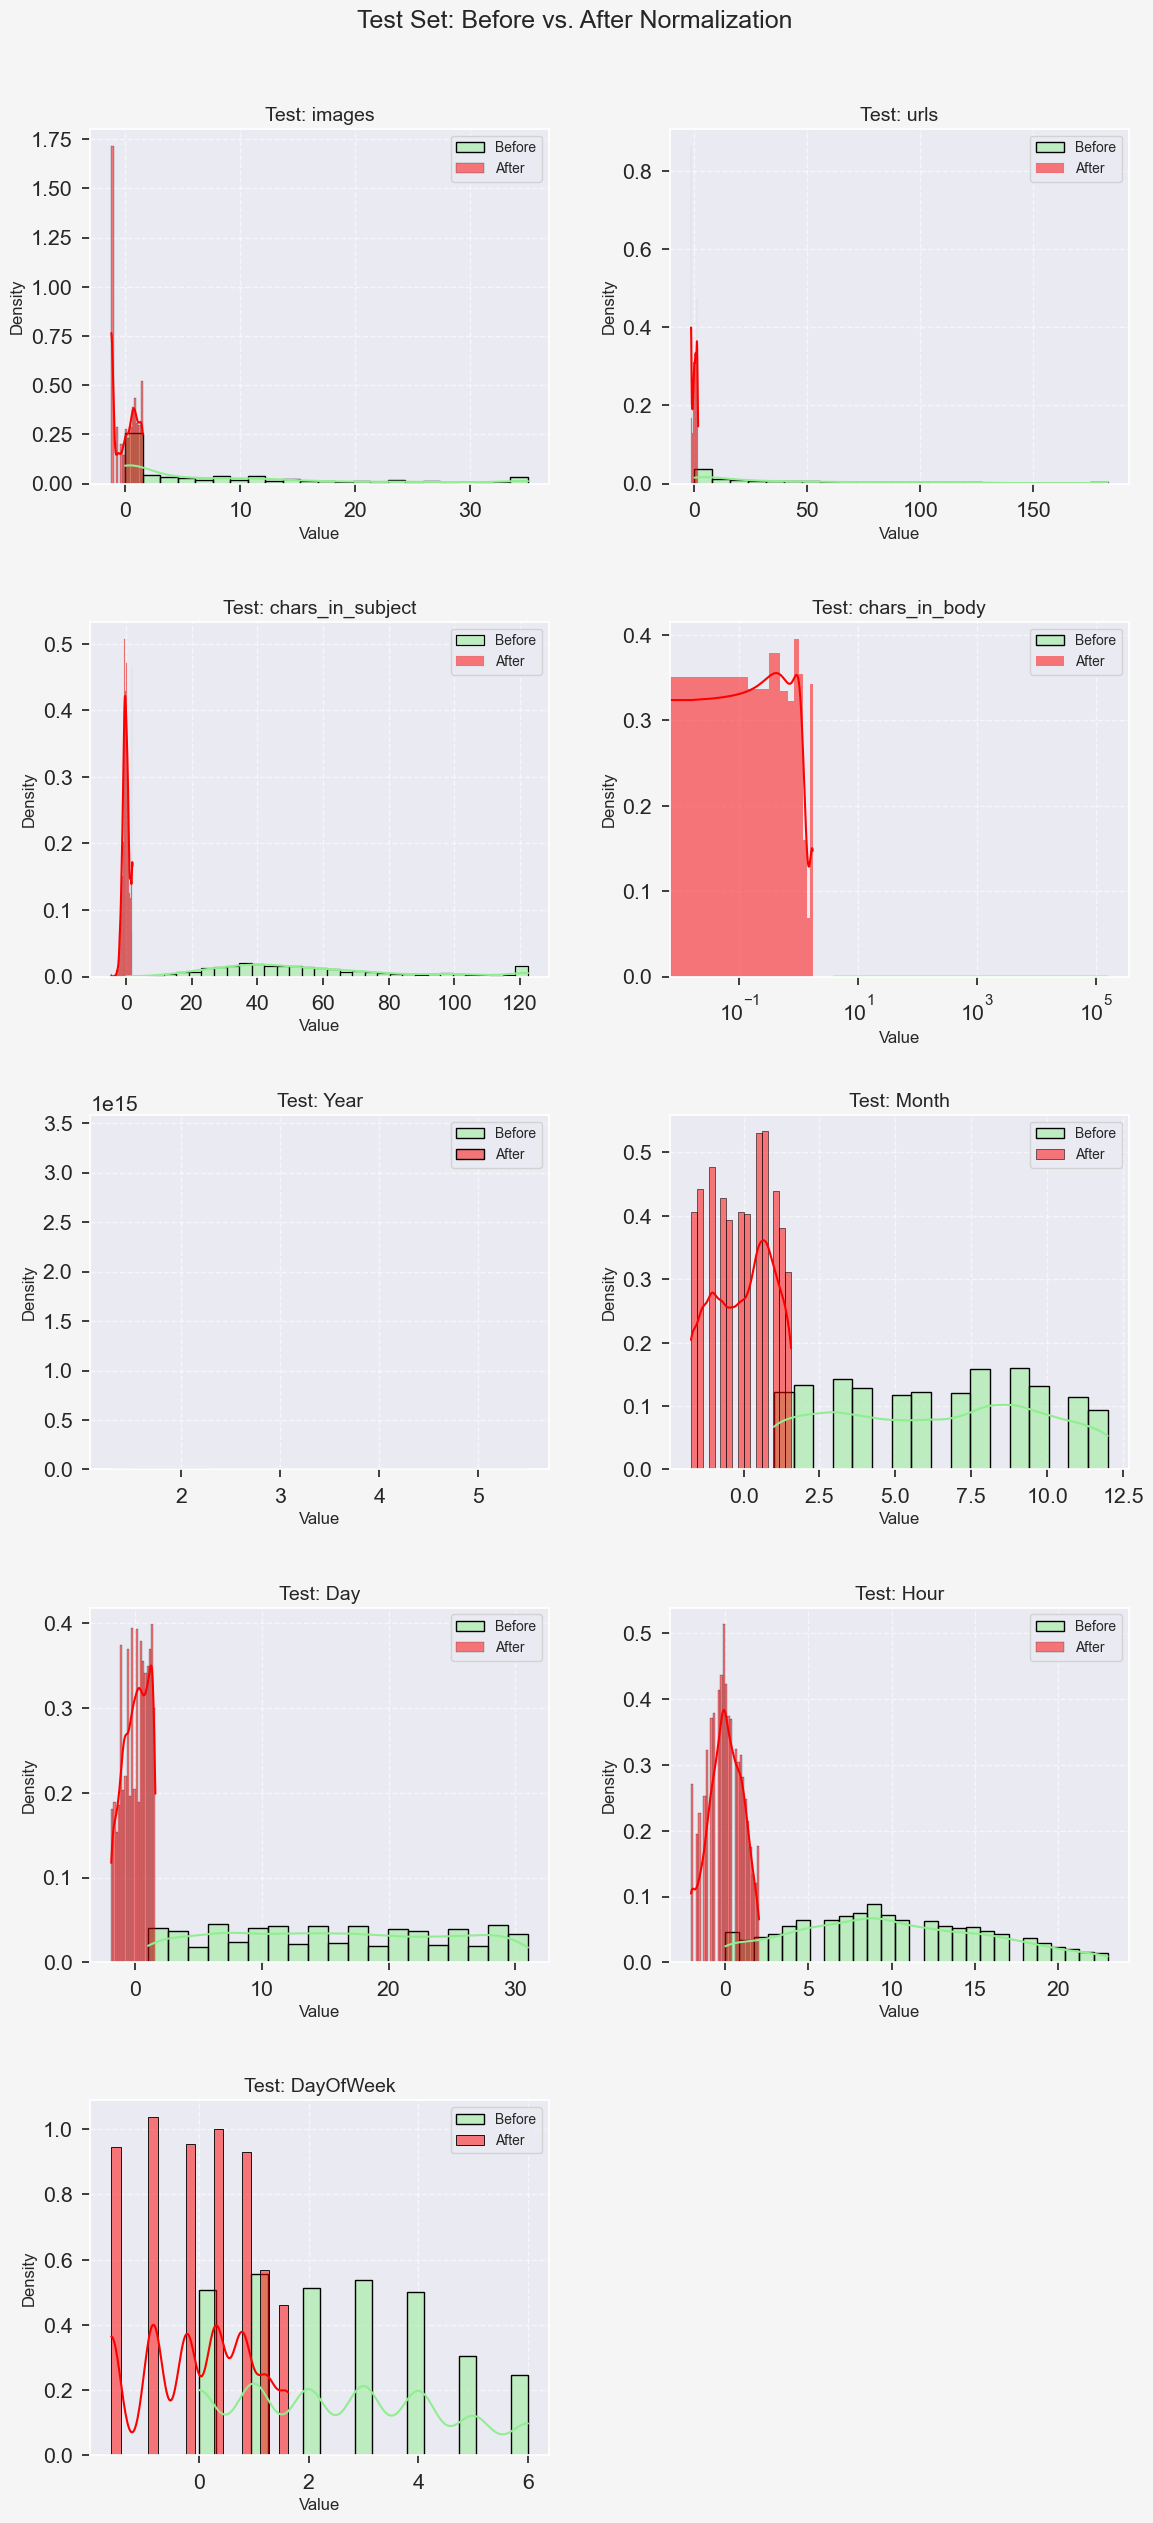

In [43]:
# Test: Before vs. After
plt.figure(figsize=figsize, facecolor='#f5f5f5')
for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(test_df[col], label="Before", kde=True, color='lightgreen', alpha=0.5, stat='density', binrange=bin_ranges[col])
    sns.histplot(test_norm[col], label="After", kde=True, color='red', alpha=0.5, stat='density')
    plt.title(f"Test: {col}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(frameon=True, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    if test_df[col].max() > 1000:
        plt.xscale('log')
plt.tight_layout(pad=2)
plt.suptitle("Test Set: Before vs. After Normalization", fontsize=18, y=1.02)
plt.show()

In [44]:
print("Train Norm Stats:\n", X_norm[numerical_cols_to_transform].describe())
print("Test Norm Stats:\n", test_norm[numerical_cols_to_transform].describe())

Train Norm Stats:
              images          urls  chars_in_subject  chars_in_body  \
count  1.406400e+04  1.406400e+04      1.406400e+04   1.406400e+04   
mean   4.546988e-18  3.536547e-17     -1.869317e-17   2.197711e-17   
std    1.000036e+00  1.000036e+00      1.000036e+00   1.000036e+00   
min   -1.191355e+00 -1.508590e+00     -4.510545e+00  -2.159307e+00   
25%   -1.191355e+00 -9.711283e-01     -6.785235e-01  -8.026675e-01   
50%    5.902015e-02  1.023373e-01     -7.292614e-02   5.322673e-02   
75%    8.952824e-01  8.485319e-01      6.436346e-01   7.804405e-01   
max    1.551845e+00  1.653133e+00      1.941880e+00   1.739969e+00   

               Year         Month           Day          Hour     DayOfWeek  
count  1.406400e+04  1.406400e+04  1.406400e+04  1.406400e+04  1.406400e+04  
mean  -6.567872e-18  1.212530e-17 -1.212530e-17  2.576627e-17  1.515663e-18  
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  
min   -1.927426e+00 -1.733809e+00 -1.9

In [45]:
X_norm['salutations'] = df['salutations']
X_norm['designation'] = df['designation']
X_norm['bcced'] = df['bcced']
X_norm['ccs'] = df['ccs']
X_norm.describe()

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,designation,salutations,ccs
count,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,1.406400e+04,14064.0,14064.0,14064.000000,14064.000000
mean,4.546988e-18,3.536547e-17,-1.869317e-17,2.197711e-17,-6.567872e-18,1.212530e-17,-1.212530e-17,2.576627e-17,1.515663e-18,0.0,0.0,0.409699,0.254900
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.0,0.0,0.491796,0.553829
min,-1.191355e+00,-1.508590e+00,-4.510545e+00,-2.159307e+00,-1.927426e+00,-1.733809e+00,-1.903015e+00,-2.063418e+00,-1.597310e+00,0.0,0.0,0.000000,0.000000
25%,-1.191355e+00,-9.711283e-01,-6.785235e-01,-8.026675e-01,-5.195784e-01,-7.246180e-01,-7.845970e-01,-6.427954e-01,-8.311335e-01,0.0,0.0,0.000000,0.000000
50%,5.902015e-02,1.023373e-01,-7.292614e-02,5.322673e-02,4.104378e-01,1.790009e-01,4.434110e-02,7.818067e-02,3.096041e-01,0.0,0.0,0.000000,0.000000
75%,8.952824e-01,8.485319e-01,6.436346e-01,7.804405e-01,4.104378e-01,7.480377e-01,8.534535e-01,7.262284e-01,7.845357e-01,0.0,0.0,1.000000,0.000000
max,1.551845e+00,1.653133e+00,1.941880e+00,1.739969e+00,1.796116e+00,1.566710e+00,1.576625e+00,2.027307e+00,1.626227e+00,0.0,0.0,1.000000,5.049856


In [46]:
test_norm['salutations'] = test_df['salutations']
test_norm['designation'] = test_df['designation']
test_norm['bcced'] = test_df['bcced']
test_norm['ccs'] = test_df['ccs']
test_norm.describe()

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,designation,salutations,ccs
count,6029.000000,6029.000000,6029.000000,6029.000000,6.029000e+03,6029.000000,6029.000000,6029.000000,6029.000000,6029.0,6029.0,6029.000000,6029.0
mean,-0.001044,0.016529,0.000596,-0.004379,1.796116e+00,-0.035223,0.031137,0.007097,-0.016520,0.0,0.0,0.414828,0.0
std,1.002202,1.002415,1.004758,1.004406,2.220630e-16,1.001933,0.986558,1.008567,1.001178,0.0,0.0,0.492733,0.0
min,-1.191355,-1.508590,-4.510545,-2.159307,1.796116e+00,-1.733809,-1.903015,-2.063418,-1.597310,0.0,0.0,0.000000,0.0
25%,-1.191355,-0.869068,-0.678523,-0.823975,1.796116e+00,-1.044910,-0.784597,-0.642795,-0.831133,0.0,0.0,0.000000,0.0
50%,0.059020,0.102337,-0.072926,0.070131,1.796116e+00,0.179001,0.151785,0.078181,0.309604,0.0,0.0,0.000000,0.0
75%,0.895282,0.891244,0.643635,0.802439,1.796116e+00,0.748038,0.853454,0.726228,0.784536,0.0,0.0,1.000000,0.0
max,1.551845,1.653133,1.941880,1.739969,1.796116e+00,1.566710,1.576625,2.027307,1.626227,0.0,0.0,1.000000,0.0


## One hot encoding

In [47]:
cat_cols = X_norm.select_dtypes(include=["object"]).columns
cat_cols

Index(['org', 'tld', 'mail_type'], dtype='object')

In [48]:
encoded_df = pd.get_dummies(X_norm, columns=cat_cols, drop_first=False)
encoded_df

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,...,tld_vnet.ibm.com,tld_wfp.org,tld_xoom.com,mail_type_Multipart/Mixed,mail_type_Text/Html,mail_type_multipart/alternative,mail_type_multipart/mixed,mail_type_multipart/related,mail_type_text/html,mail_type_text/plain
0,-1.191355,-1.508590,-1.347453,-1.154090,-0.519578,0.179001,-1.702389,-0.840060,1.220392,0.0,...,False,False,False,False,False,True,False,False,False,False
1,-1.191355,-1.508590,-0.273765,-0.951167,-0.519578,-1.044910,0.562351,-0.642795,1.626227,0.0,...,False,False,False,False,False,True,False,False,False,False
2,-0.334561,0.077998,0.003490,-0.971583,1.335315,-1.733809,0.151785,0.726228,-0.831133,0.0,...,False,False,False,False,False,True,False,False,False,False
3,0.660594,1.037739,0.519821,0.466523,-1.927426,0.748038,-0.177457,1.890695,1.220392,0.0,...,False,False,False,False,False,True,False,False,False,False
4,0.660594,0.369062,0.077885,0.742679,0.410438,0.748038,1.132779,0.569409,-0.831133,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14059,0.726545,1.037739,1.941880,0.467095,-1.927426,0.748038,0.947776,-1.046994,-0.219403,0.0,...,False,False,False,False,False,True,False,False,False,False
14060,-0.334561,-1.095854,-0.678523,-0.713436,-0.519578,-0.114443,1.223579,-0.642795,-1.597310,0.0,...,False,False,False,False,False,True,False,False,False,False
14061,0.508165,0.757476,1.444827,0.960882,1.796116,-1.044910,-0.784597,0.569409,0.784536,0.0,...,False,False,False,False,False,True,False,False,False,False
14062,0.198763,0.815316,0.519821,0.550921,1.335315,-1.379346,1.313317,0.726228,-0.219403,0.0,...,False,False,False,False,False,True,False,False,False,False


In [49]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14064 entries, 0 to 14063
Columns: 376 entries, images to mail_type_text/plain
dtypes: bool(363), float64(13)
memory usage: 6.3 MB


In [50]:
df_normalized = encoded_df.copy()

In [51]:
df_normalized['label'] = y
df_normalized

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,...,tld_wfp.org,tld_xoom.com,mail_type_Multipart/Mixed,mail_type_Text/Html,mail_type_multipart/alternative,mail_type_multipart/mixed,mail_type_multipart/related,mail_type_text/html,mail_type_text/plain,label
0,-1.191355,-1.508590,-1.347453,-1.154090,-0.519578,0.179001,-1.702389,-0.840060,1.220392,0.0,...,False,False,False,False,True,False,False,False,False,0.0
1,-1.191355,-1.508590,-0.273765,-0.951167,-0.519578,-1.044910,0.562351,-0.642795,1.626227,0.0,...,False,False,False,False,True,False,False,False,False,0.0
2,-0.334561,0.077998,0.003490,-0.971583,1.335315,-1.733809,0.151785,0.726228,-0.831133,0.0,...,False,False,False,False,True,False,False,False,False,0.0
3,0.660594,1.037739,0.519821,0.466523,-1.927426,0.748038,-0.177457,1.890695,1.220392,0.0,...,False,False,False,False,True,False,False,False,False,1.0
4,0.660594,0.369062,0.077885,0.742679,0.410438,0.748038,1.132779,0.569409,-0.831133,0.0,...,False,False,False,False,True,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14059,0.726545,1.037739,1.941880,0.467095,-1.927426,0.748038,0.947776,-1.046994,-0.219403,0.0,...,False,False,False,False,True,False,False,False,False,1.0
14060,-0.334561,-1.095854,-0.678523,-0.713436,-0.519578,-0.114443,1.223579,-0.642795,-1.597310,0.0,...,False,False,False,False,True,False,False,False,False,0.0
14061,0.508165,0.757476,1.444827,0.960882,1.796116,-1.044910,-0.784597,0.569409,0.784536,0.0,...,False,False,False,False,True,False,False,False,False,1.0
14062,0.198763,0.815316,0.519821,0.550921,1.335315,-1.379346,1.313317,0.726228,-0.219403,0.0,...,False,False,False,False,True,False,False,False,False,1.0


In [52]:
cat_cols_test = test_norm.select_dtypes(include=["object"]).columns
cat_cols_test

Index(['org', 'tld', 'mail_type'], dtype='object')

In [53]:
encoded_df_test = pd.get_dummies(test_norm, columns=cat_cols_test, drop_first=False)
encoded_df_test

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,...,tld_vnet.ibm.com,tld_wfp.org,tld_xoom.com,mail_type_Multipart/Mixed,mail_type_Text/Html,mail_type_multipart/alternative,mail_type_multipart/mixed,mail_type_multipart/related,mail_type_text/html,mail_type_text/plain
0,-1.191355,-0.971128,1.941880,-0.590743,1.796116,-1.379346,1.313317,1.179837,0.309604,0.0,...,False,False,False,False,False,True,False,False,False,False
1,0.588254,0.403895,0.185957,0.399525,1.796116,1.297819,1.313317,-1.046994,-0.831133,0.0,...,False,False,False,False,False,True,False,False,False,False
2,1.032731,0.386643,-0.582950,-0.060129,1.796116,0.179001,-0.409985,0.245741,-0.831133,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.943980,0.453818,-0.536473,-0.578922,1.796116,-0.724618,-0.292246,-0.453448,-0.831133,0.0,...,False,False,False,False,False,True,False,False,False,False
4,1.440316,1.388340,1.468476,0.984329,1.796116,0.466226,-0.531004,0.409355,0.309604,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,1.415826,1.653133,1.173217,1.118404,1.796116,-0.114443,1.402042,-0.270761,0.309604,0.0,...,False,False,False,False,False,True,False,False,False,False
6025,1.551845,1.653133,0.040932,1.157362,1.796116,0.748038,-1.358101,1.752376,0.309604,0.0,...,False,False,False,False,False,True,False,False,False,False
6026,1.148647,1.133929,-0.273765,0.453188,1.796116,-1.044910,0.044341,1.031222,-0.831133,0.0,...,False,False,False,False,False,True,False,False,False,False
6027,0.316615,0.453818,0.905414,0.533834,1.796116,-0.724618,0.660821,0.880087,0.784536,0.0,...,False,False,False,False,False,True,False,False,False,False


In [54]:
encoded_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Columns: 319 entries, images to mail_type_text/plain
dtypes: bool(306), float64(13)
memory usage: 2.4 MB


In [55]:
df_normalized_test = encoded_df_test.copy()

In [56]:
positively_correlated_features = df_normalized.corr()['label'].sort_values(ascending = False).head(11)
positively_correlated_features

label               1.000000
images              0.754686
urls                0.712750
tld_com             0.545389
chars_in_body       0.305947
chars_in_subject    0.238612
tld_in              0.212086
org_amazon          0.192694
org_linkedin        0.192023
org_twitter         0.186824
Year                0.185675
Name: label, dtype: float64

In [57]:
negatively_correlated_features = df_normalized.corr()['label'].sort_values(ascending = True).head(11)
negatively_correlated_features

org_iiitd                     -0.926147
tld_ac.in                     -0.913160
ccs                           -0.629099
salutations                   -0.418616
mail_type_multipart/related   -0.220166
org_centralesupelec           -0.175473
tld_fr                        -0.169779
org_github                    -0.145747
mail_type_text/plain          -0.136616
mail_type_multipart/mixed     -0.116402
Month                         -0.055773
Name: label, dtype: float64

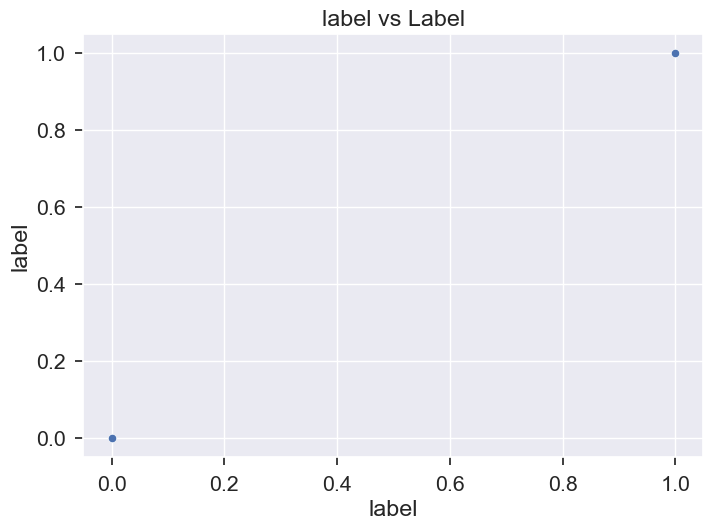

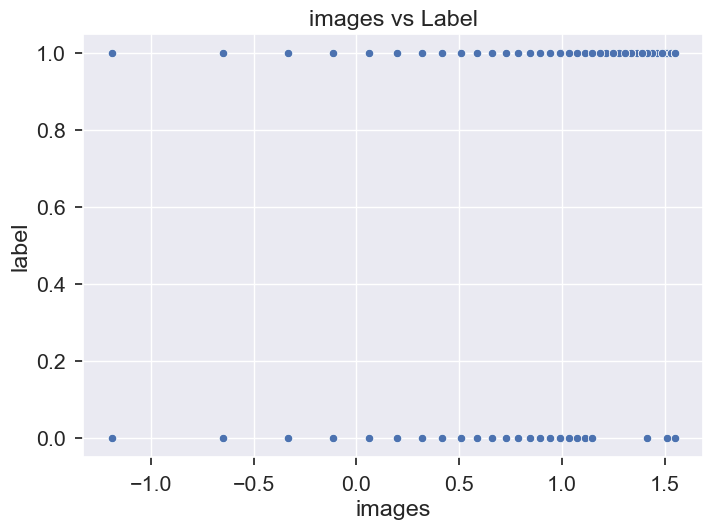

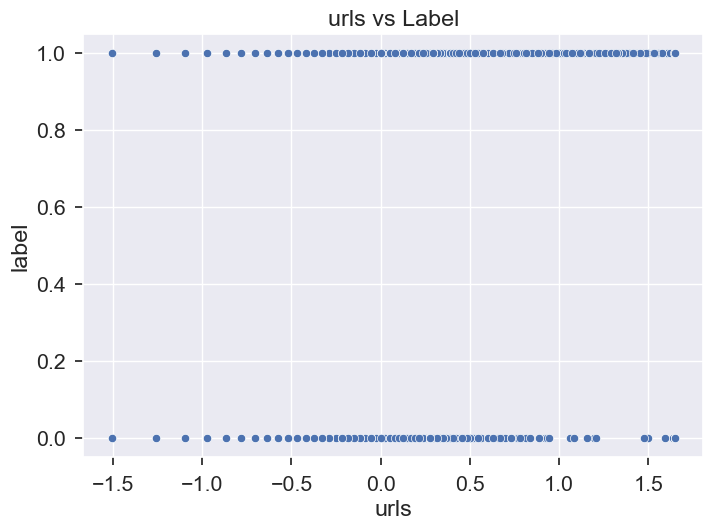

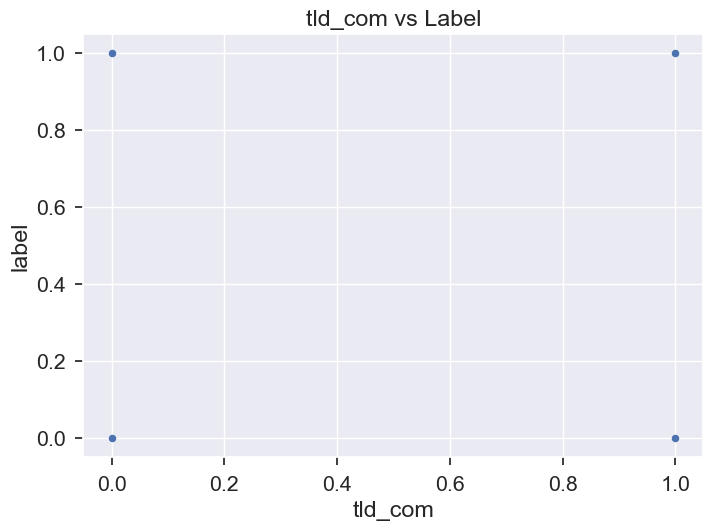

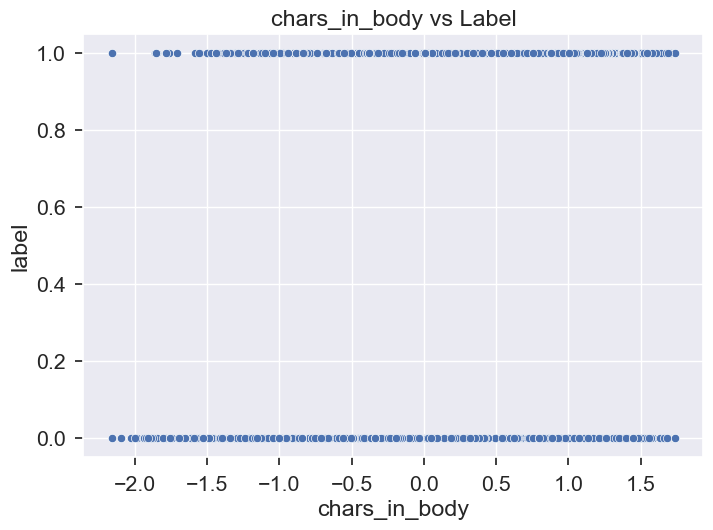

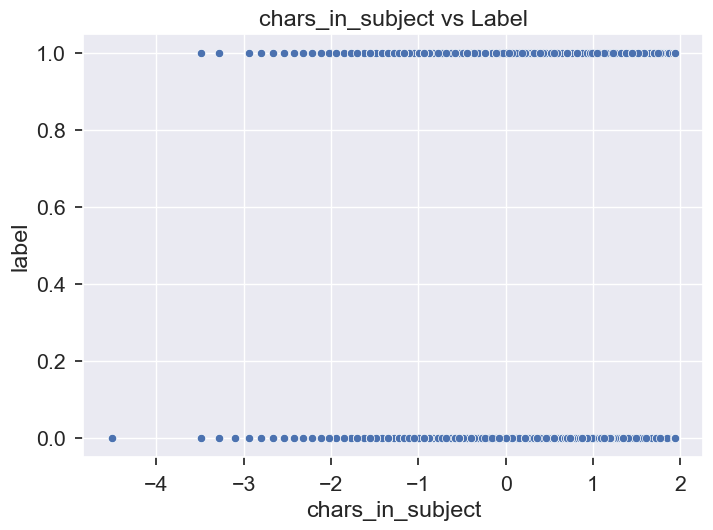

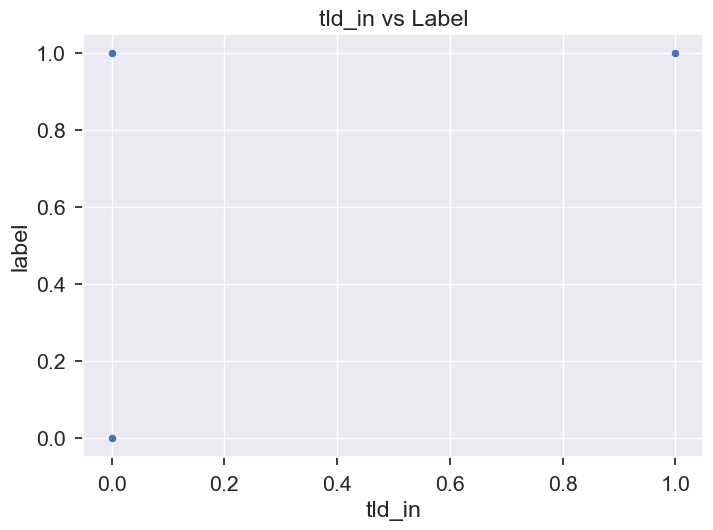

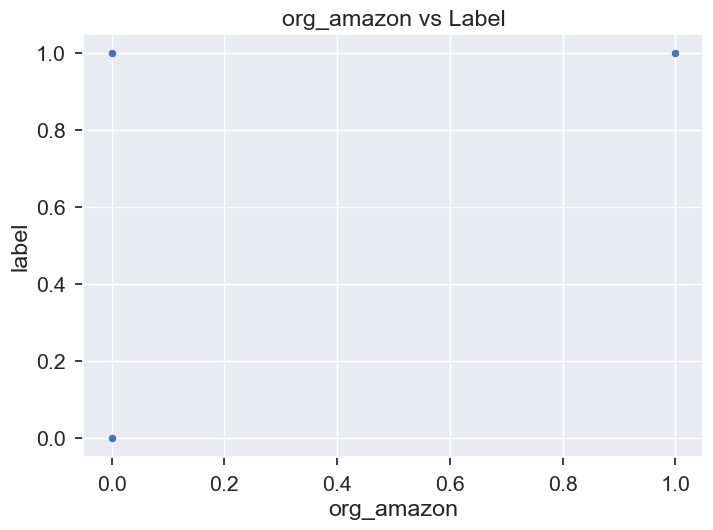

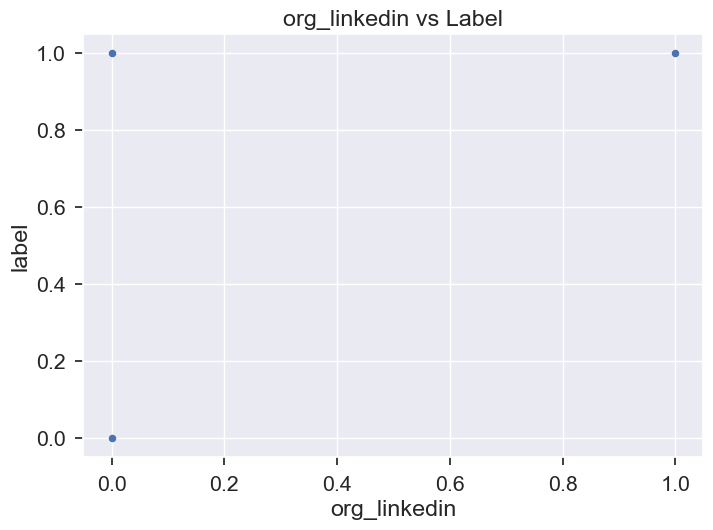

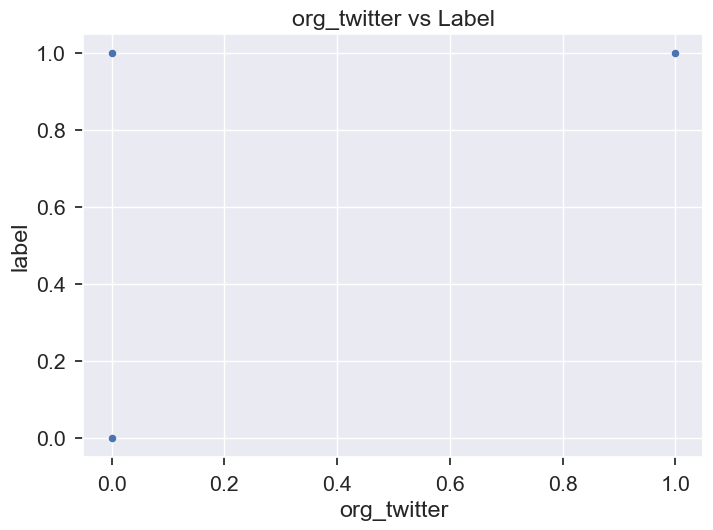

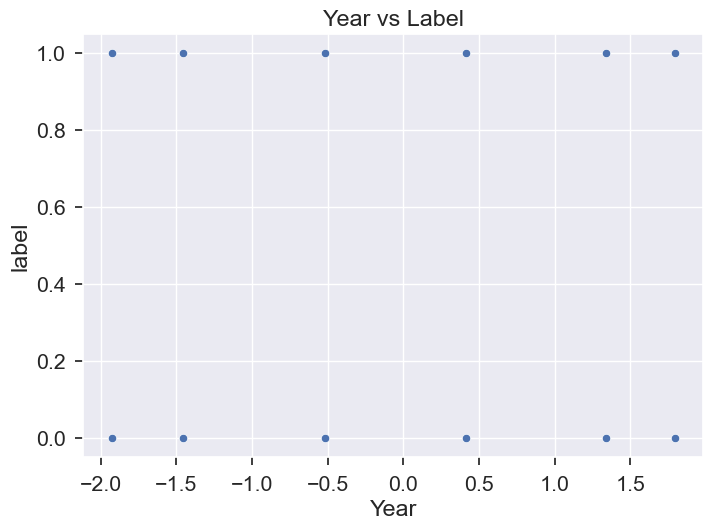

In [58]:
for index in positively_correlated_features.index:
    fig1, ax = plt.subplots()
    sns.scatterplot(x=index,y='label', data=df_normalized)
    ax.set_title(f"{index} vs Label")
    plt.show()

### 3.1 Handling Class Imbalance

In [59]:
X = df.drop(['label'], axis=1)
y = df['label']

In [60]:
y.value_counts()

label
1.0    9204
0.0    4860
Name: count, dtype: int64

<Axes: ylabel='count'>

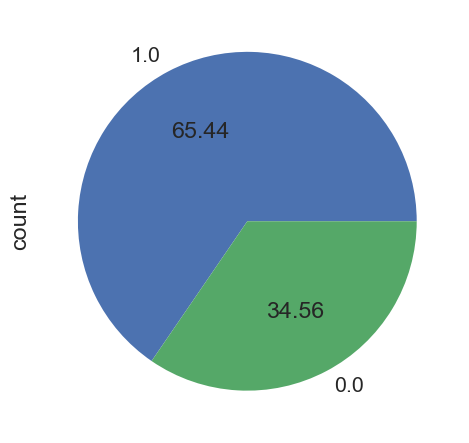

In [61]:
y.value_counts().plot.pie(autopct='%.2f')

### as we can see data is not balanced

### handling class imbalance using SMOTE oversampling technique

In [62]:
smote = SMOTE(random_state=42)
y = df_normalized['label']
X = df_normalized.drop('label', axis=1)
X_res, y_res = smote.fit_resample(X, y)

print("Resampled target distribution:\n", y_res.value_counts())

Resampled target distribution:
 label
0.0    9204
1.0    9204
Name: count, dtype: int64


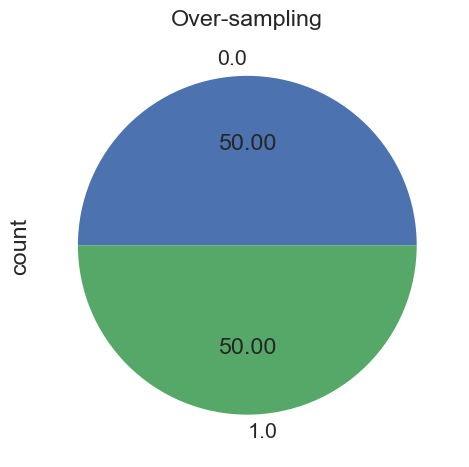

In [63]:
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [64]:
df = X_res
df['label'] = y_res
df_test = df_normalized_test.copy()
df_test.describe()

C:\Users\wwwir\AppData\Local\Temp\ipykernel_23496\225416839.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = y_res


,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,designation,salutations,ccs
count,6029.000000,6029.000000,6029.000000,6029.000000,6.029000e+03,6029.000000,6029.000000,6029.000000,6029.000000,6029.0,6029.0,6029.000000,6029.0
mean,-0.001044,0.016529,0.000596,-0.004379,1.796116e+00,-0.035223,0.031137,0.007097,-0.016520,0.0,0.0,0.414828,0.0
std,1.002202,1.002415,1.004758,1.004406,2.220630e-16,1.001933,0.986558,1.008567,1.001178,0.0,0.0,0.492733,0.0
min,-1.191355,-1.508590,-4.510545,-2.159307,1.796116e+00,-1.733809,-1.903015,-2.063418,-1.597310,0.0,0.0,0.000000,0.0
25%,-1.191355,-0.869068,-0.678523,-0.823975,1.796116e+00,-1.044910,-0.784597,-0.642795,-0.831133,0.0,0.0,0.000000,0.0
50%,0.059020,0.102337,-0.072926,0.070131,1.796116e+00,0.179001,0.151785,0.078181,0.309604,0.0,0.0,0.000000,0.0
75%,0.895282,0.891244,0.643635,0.802439,1.796116e+00,0.748038,0.853454,0.726228,0.784536,0.0,0.0,1.000000,0.0
max,1.551845,1.653133,1.941880,1.739969,1.796116e+00,1.566710,1.576625,2.027307,1.626227,0.0,0.0,1.000000,0.0


In [65]:
df.head()

,images,urls,chars_in_subject,chars_in_body,Year,Month,Day,Hour,DayOfWeek,bcced,...,tld_wfp.org,tld_xoom.com,mail_type_Multipart/Mixed,mail_type_Text/Html,mail_type_multipart/alternative,mail_type_multipart/mixed,mail_type_multipart/related,mail_type_text/html,mail_type_text/plain,label
0,-1.191355,-1.508590,-1.347453,-1.154090,-0.519578,0.179001,-1.702389,-0.840060,1.220392,0.0,...,False,False,False,False,True,False,False,False,False,0.0
1,-1.191355,-1.508590,-0.273765,-0.951167,-0.519578,-1.044910,0.562351,-0.642795,1.626227,0.0,...,False,False,False,False,True,False,False,False,False,0.0
2,-0.334561,0.077998,0.003490,-0.971583,1.335315,-1.733809,0.151785,0.726228,-0.831133,0.0,...,False,False,False,False,True,False,False,False,False,0.0
3,0.660594,1.037739,0.519821,0.466523,-1.927426,0.748038,-0.177457,1.890695,1.220392,0.0,...,False,False,False,False,True,False,False,False,False,1.0
4,0.660594,0.369062,0.077885,0.742679,0.410438,0.748038,1.132779,0.569409,-0.831133,0.0,...,False,False,False,False,True,False,False,False,False,1.0


#   Exploratory Data Analysis


In [66]:
plt.style.use('seaborn-v0_8')
sns.set_context('notebook', font_scale=1.2)


print("=== Cleaned Train Dataset Overview ===")
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nNumerical Summary:")
print(df.select_dtypes(include=['int64', 'float64']).describe())
print("\nCategorical Summary:")
print(df.select_dtypes(include=['bool']).describe())

=== Cleaned Train Dataset Overview ===
Shape: (18408, 377)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Columns: 377 entries, images to label
dtypes: bool(363), float64(14)
memory usage: 8.3 MB
None

Numerical Summary:
             images          urls  chars_in_subject  chars_in_body  \
count  18408.000000  18408.000000      18408.000000   18408.000000   
mean      -0.248912     -0.233614         -0.074819      -0.100031   
std        0.993751      1.002566          1.010118       1.033662   
min       -1.191355     -1.508590         -4.510545      -2.159307   
25%       -1.191355     -1.259350         -0.727704      -0.942047   
50%       -0.649128     -0.290697         -0.151503      -0.150652   
75%        0.726545      0.617305          0.582353       0.717951   
max        1.551845      1.653133          1.941880       1.739969   

               Year         Month           Day          Hour     DayOfWeek  \
count  18408.000000  18408.000000

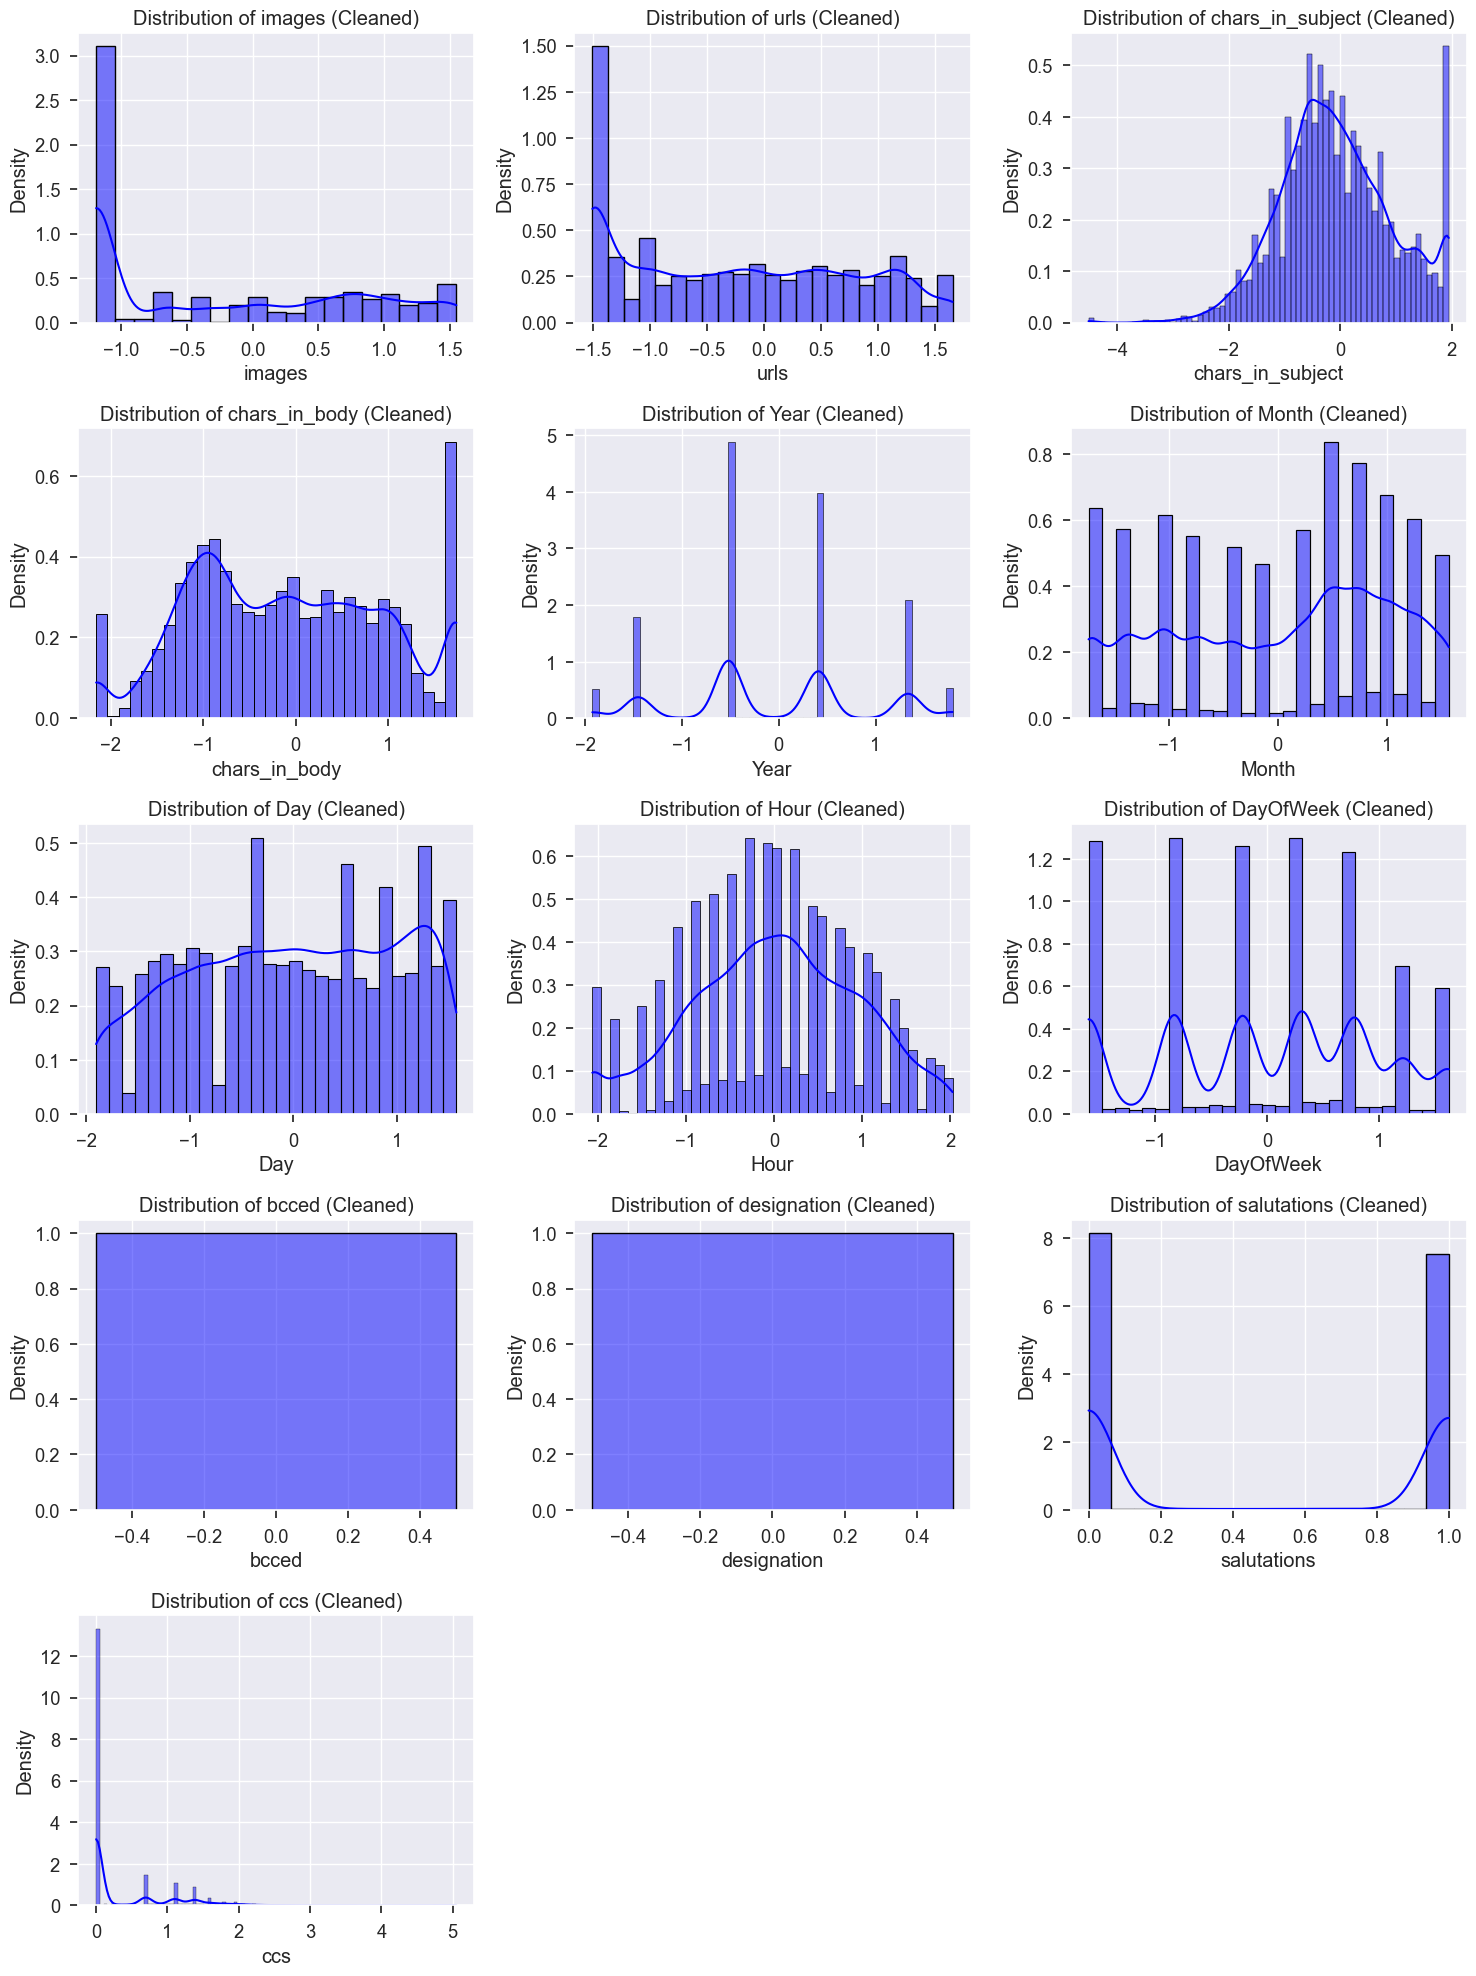

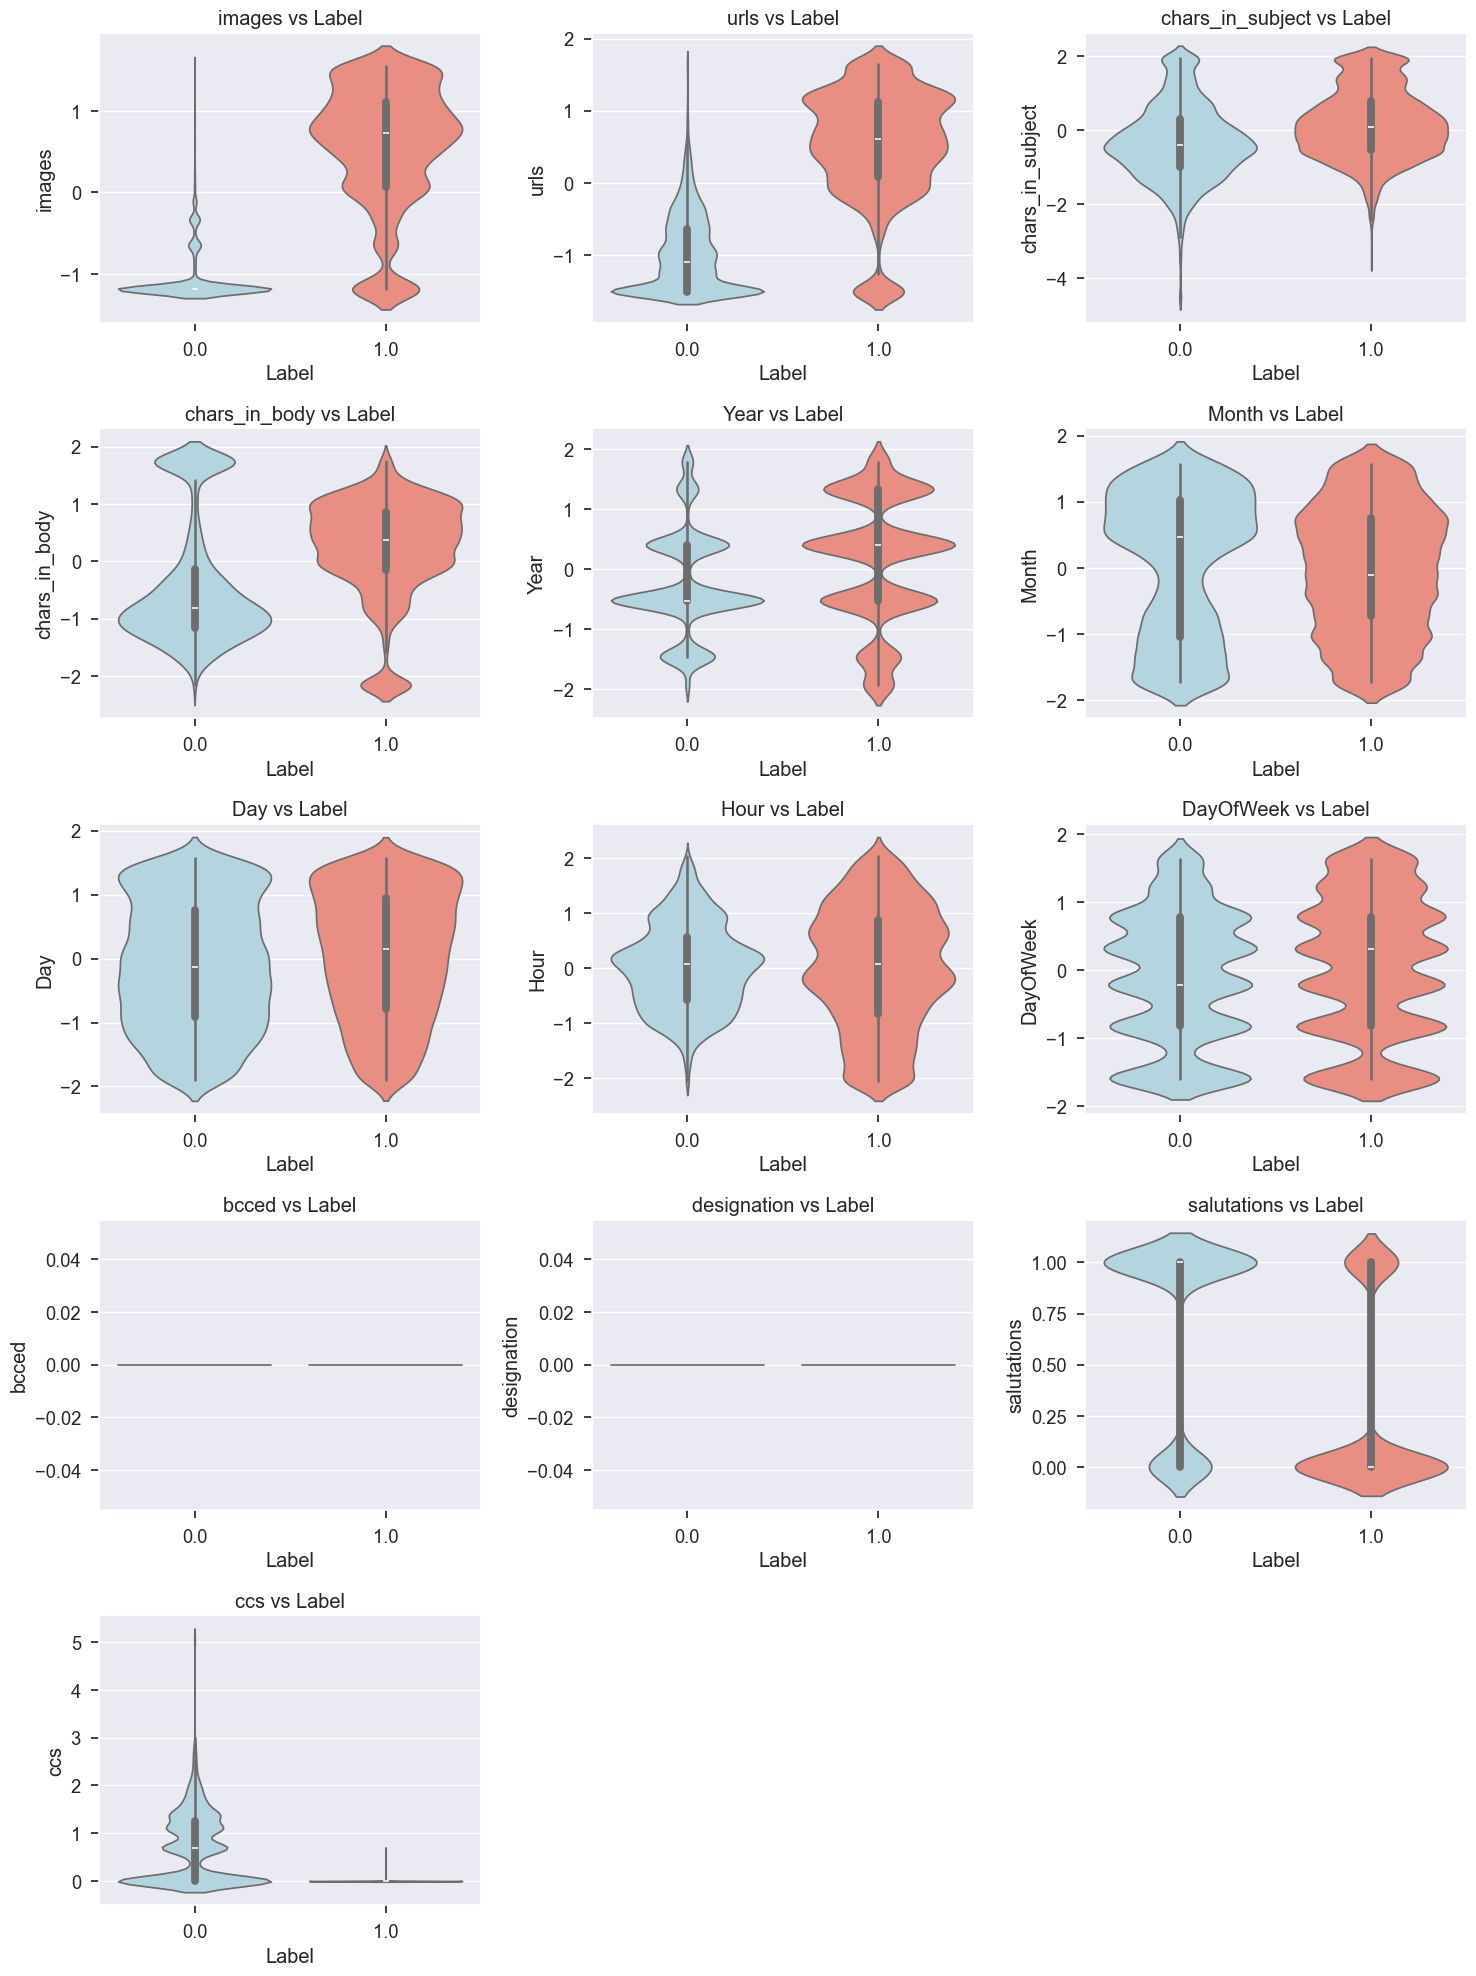

In [67]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['Id', 'label']]
if num_cols:
    rows = math.ceil(len(num_cols) / 3)
    plt.figure(figsize=(15, rows * 4))
    for i, col in enumerate(num_cols):
        plt.subplot(rows, 3, i + 1)
        try:
            sns.histplot(df[col], kde=True, stat='density', color='blue')
            plt.title(f'Distribution of {col} (Cleaned)')
            plt.xlabel(col)
            plt.ylabel('Density')
        except Exception as e:
            print(f"Error plotting {col}: {e}")
    plt.tight_layout()
    plt.show()

    if 'label' in df.columns:
        plt.figure(figsize=(15, rows * 4))
        for i, col in enumerate(num_cols):
            plt.subplot(rows, 3, i + 1)
            try:
                sns.violinplot(x=df['label'], y=df[col], hue=df['label'], palette=['lightblue', 'salmon'], legend=False)
                plt.title(f'{col} vs Label')
                plt.xlabel('Label')
                plt.ylabel(col)
            except Exception as e:
                print(f"Error plotting {col} vs Label: {e}")
        plt.tight_layout()
        plt.show()

In [68]:
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    rows = math.ceil(len(cat_cols) / 2)
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cat_cols):
        plt.subplot(rows, 2, i + 1)
        try:
            top_n = df[col].value_counts().nlargest(10)
            sns.barplot(x=top_n.values, y=top_n.index, color='salmon')
            plt.title(f'Top 10 {col} Counts (Cleaned)')
            plt.xlabel('Count')
            plt.ylabel(col)
        except Exception as e:
            print(f"Error plotting {col}: {e}")
    plt.tight_layout()
    plt.show()

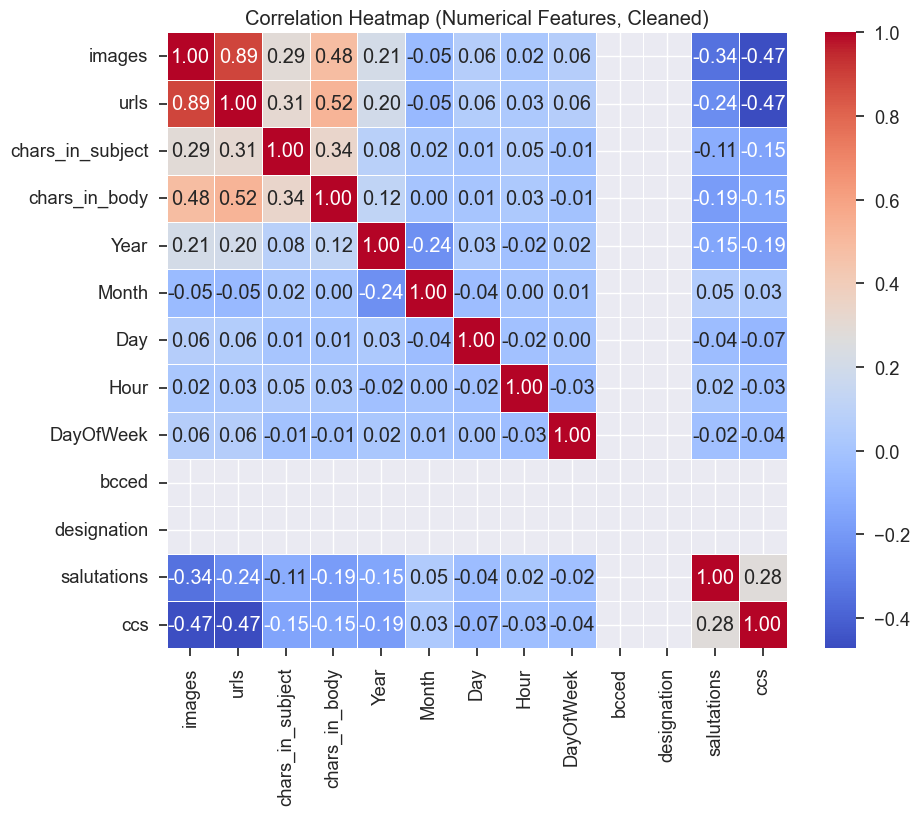


=== Mutual Information Scores (Cleaned) ===
             Feature  MI Score
0             images  0.446977
1               urls  0.446548
3      chars_in_body  0.356885
12               ccs  0.280297
7               Hour  0.195897
2   chars_in_subject  0.193008
6                Day  0.153231
5              Month  0.131502
11       salutations  0.125287
8          DayOfWeek  0.097104
4               Year  0.087944
9              bcced  0.000070
10       designation  0.000000


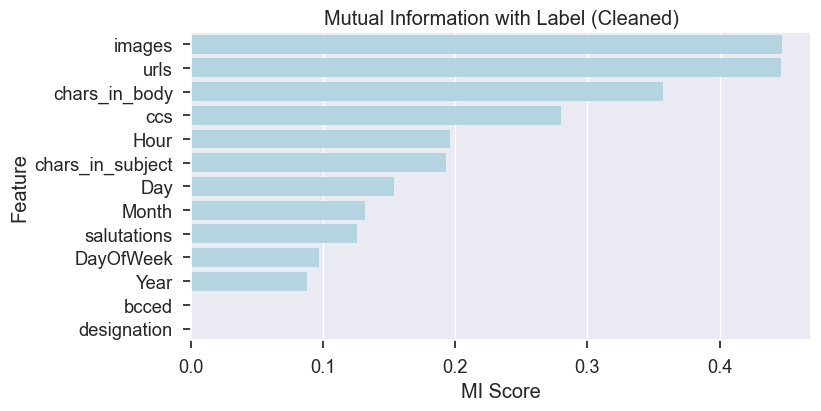

In [69]:

if num_cols:

    plt.figure(figsize=(10, 8))
    corr_matrix = df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Correlation Heatmap (Numerical Features, Cleaned)')
    plt.show()


    if 'label' in df.columns:
        X = df[num_cols]
        y = df['label']
        try:
            mi_scores = mutual_info_classif(X, y, random_state=42)
            mi_df = pd.DataFrame({'Feature': num_cols, 'MI Score': mi_scores}).sort_values('MI Score', ascending=False)
            print("\n=== Mutual Information Scores (Cleaned) ===")
            print(mi_df)
            plt.figure(figsize=(8, 4))
            sns.barplot(x='MI Score', y='Feature', data=mi_df, color='lightblue')
            plt.title('Mutual Information with Label (Cleaned)')
            plt.show()
        except Exception as e:
            print(f"Error computing mutual information: {e}")


### hints:
- use **encoded_df** as your train set and use **test_encoded_df** as your test set
- **X_res** is your resampled balanced features (after handling class imbalance)
- **y_res** is your resampled balanced labels (after handling class imbalance)

In [70]:
df['total_chars'] = df['chars_in_body'] * df['chars_in_subject']
df_test['total_chars'] = df_test['chars_in_body'] * df_test['chars_in_subject']

C:\Users\wwwir\AppData\Local\Temp\ipykernel_23496\3505236385.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_chars'] = df['chars_in_body'] * df['chars_in_subject']


## PCA

In [71]:
from sklearn.decomposition import PCA
scaler = StandardScaler()

features = ['images', 'urls', 'total_chars', 'ccs']
df_clean = df[features].dropna()
df_clean_test = df_test[features].dropna()
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_clean)
principal_components_test = pca.transform(df_clean_test)
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
pca_df_test = pd.DataFrame(principal_components_test, columns=[f'PC{i+1}' for i in range(principal_components_test.shape[1])])

In [72]:
correlations = df.corr()['label'].drop('label')
print("Correlations:\n", correlations)

top_8_columns = correlations.abs().nlargest(8).index
print("\nTop 8 correlated columns:\n", correlations[top_8_columns])

pca_df = pd.concat([pca_df, encoded_df[top_8_columns]], axis=1)
pca_df_test = pd.concat([pca_df_test, encoded_df_test[top_8_columns]], axis=1)

print("\nUpdated pca_df:\n", pca_df)

Correlations:
 images                         0.802346
urls                           0.749635
chars_in_subject               0.245729
chars_in_body                  0.311861
Year                           0.198740
                                 ...   
mail_type_multipart/mixed     -0.118085
mail_type_multipart/related   -0.196301
mail_type_text/html            0.195670
mail_type_text/plain          -0.125544
total_chars                   -0.087020
Name: label, Length: 377, dtype: float64

Top 8 correlated columns:
 org_iiitd       -0.910099
tld_ac.in       -0.894680
images           0.802346
urls             0.749635
tld_com          0.598497
ccs             -0.579007
salutations     -0.445196
chars_in_body    0.311861
Name: label, dtype: float64

Updated pca_df:
             PC1       PC2       PC3 org_iiitd tld_ac.in    images      urls  \
0     -2.044412  0.731326  0.862017      True      True -1.191355 -1.508590   
1     -1.925860 -0.596293  1.478388      True      True -1.19135

## Model Training: Use SVC

In [73]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y_res, test_size=0.2, random_state=42, stratify=y_res)
print(X_train.isna().sum())

PC1                 0
PC2                 0
PC3                 0
org_iiitd        3496
tld_ac.in        3496
images           3496
urls             3496
tld_com          3496
ccs              3496
salutations      3496
chars_in_body    3496
dtype: int64


In [74]:
print(X_train.dtypes)

PC1              float64
PC2              float64
PC3              float64
org_iiitd         object
tld_ac.in         object
images           float64
urls             float64
tld_com           object
ccs              float64
salutations      float64
chars_in_body    float64
dtype: object


In [75]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].dropna().isin([True, False]).all():  # checks if it's a bool-like object column
            X_train[col] = X_train[col].fillna(False).astype(bool)

C:\Users\wwwir\AppData\Local\Temp\ipykernel_23496\2642027984.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].fillna(False).astype(bool)
C:\Users\wwwir\AppData\Local\Temp\ipykernel_23496\2642027984.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].fillna(False).astype(bool)
C:\Users\wwwir\AppData\Local\Temp\ipykernel_23496\2642027984.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=F

In [76]:
print(X_train.isna().sum())

PC1                 0
PC2                 0
PC3                 0
org_iiitd           0
tld_ac.in           0
images           3496
urls             3496
tld_com             0
ccs              3496
salutations      3496
chars_in_body    3496
dtype: int64


In [77]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy='mean')  # fill remaining NaNs
model = make_pipeline(imputer, SVC(random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('svc', SVC(random_state=42))])

In [79]:
y_test_pred = model.predict(X_test)

In [80]:
f1score = f1_score(y_test, y_test_pred)
print("Testing f1-Score:", f1score)

Testing f1-Score: 0.9932267678136006


In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [82]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1841
         1.0       0.99      1.00      0.99      1841

    accuracy                           0.99      3682
   macro avg       0.99      0.99      0.99      3682
weighted avg       0.99      0.99      0.99      3682



In [83]:
for col in pca_df_test.columns:
    if pca_df_test[col].dtype == 'object':
        if pca_df_test[col].dropna().isin([True, False]).all():
            pca_df_test[col] = pca_df_test[col].fillna(False).astype(bool)

pca_df_test = pca_df_test.astype({col: 'int' for col in pca_df_test.select_dtypes(include='bool').columns})

In [84]:
imputer = SimpleImputer(strategy='mean')
pca_df_test_imputed = pd.DataFrame(imputer.fit_transform(pca_df_test), columns=pca_df_test.columns, index=pca_df_test.index)

In [85]:

test_predictions = model.predict(pca_df_test_imputed)
test_predictions

array([0., 1., 1., ..., 1., 1., 1.])

In [86]:
# Create DataFrame with Id and label
ids = test_df['Id'].astype(int)  # Use Id from test_df
output_df = pd.DataFrame({
    'Id': ids,
    'label': test_predictions.astype(int)
})

In [87]:
#df_answers is actual answers
df_answers = pd.read_csv("answer_key.csv")

In [88]:
y_actual = df_answers.iloc[:, 1].values               # get the second column as target
y_actual

array([0, 1, 1, ..., 1, 1, 1])

In [89]:
accuracy = accuracy_score(y_actual, test_predictions)
print(f"Accuracy: {accuracy:.2%}")

print(classification_report(y_actual, test_predictions))

Accuracy: 98.19%
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2084
           1       0.98      1.00      0.99      3945

    accuracy                           0.98      6029
   macro avg       0.98      0.98      0.98      6029
weighted avg       0.98      0.98      0.98      6029



In [90]:
f1score_test = f1_score(y_actual, test_predictions)
print("Testing f1-score Score:", f1score_test)

Testing f1-score Score: 0.9863219977412473


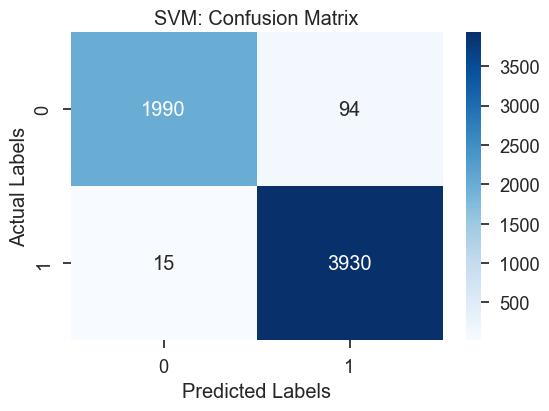

In [91]:
#plotting heatmap the predicted label vs the actual label for SVM model

plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_actual, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('SVM: Confusion Matrix')
plt.show()

In [92]:
# Save to CSV
output_df.to_csv('submission2.csv', index=False)

## Using Naive Bytes

In [93]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(pca_df), columns=pca_df.columns, index=pca_df.index)

print(X_imputed.isna().sum())

PC1              0
PC2              0
PC3              0
org_iiitd        0
tld_ac.in        0
images           0
urls             0
tld_com          0
ccs              0
salutations      0
chars_in_body    0
dtype: int64


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_res, test_size=0.2, random_state=143)

In [95]:
print(X_train.isna().sum())

PC1              0
PC2              0
PC3              0
org_iiitd        0
tld_ac.in        0
images           0
urls             0
tld_com          0
ccs              0
salutations      0
chars_in_body    0
dtype: int64


In [96]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [97]:
y_test_pred_NB = model.predict(X_test)

In [98]:
f1score_NB = f1_score(y_test, y_test_pred_NB)
print("Testing f1-Score:", f1score_NB)

Testing f1-Score: 0.9946149703823371


In [99]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [100]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.49      0.49      1827
         1.0       0.50      0.50      0.50      1855

    accuracy                           0.49      3682
   macro avg       0.49      0.49      0.49      3682
weighted avg       0.49      0.49      0.49      3682



In [101]:
imputer = SimpleImputer(strategy='mean')
X_imputed_test = pd.DataFrame(imputer.fit_transform(pca_df_test), columns=pca_df_test.columns, index=pca_df_test.index)

print(X_imputed_test.isna().sum())

PC1              0
PC2              0
PC3              0
org_iiitd        0
tld_ac.in        0
images           0
urls             0
tld_com          0
ccs              0
salutations      0
chars_in_body    0
dtype: int64


In [102]:
test_predictions_NB = model.predict(X_imputed_test)
test_predictions_NB

array([0., 1., 1., ..., 1., 1., 1.])

In [103]:
output_df2 = pd.DataFrame({
    'Id': ids,
    'label': test_predictions_NB.astype(int)
})

In [104]:
accuracy = accuracy_score(y_actual, test_predictions_NB)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 98.19%


In [105]:
print(classification_report(y_actual, test_predictions_NB))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2084
           1       0.98      1.00      0.99      3945

    accuracy                           0.98      6029
   macro avg       0.98      0.98      0.98      6029
weighted avg       0.98      0.98      0.98      6029



In [106]:
f1score_NB_test = f1_score(y_actual, test_predictions_NB)
print("Testing f1-score Score:", f1score_NB_test)

Testing f1-score Score: 0.9863219977412473


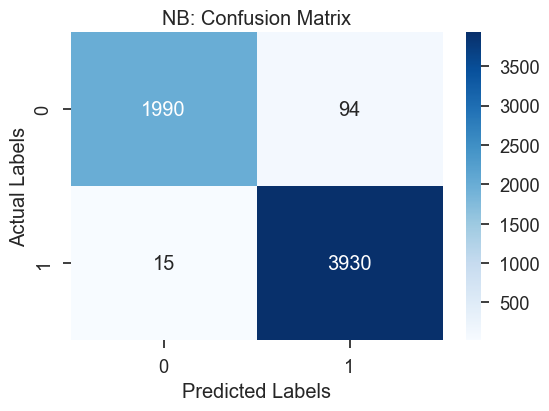

In [107]:
#plotting heatmap the predicted label vs the actual label

plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_actual, test_predictions_NB)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('NB: Confusion Matrix')
plt.show()

In [108]:
output_df2.to_csv('submission3.csv', index=False)

# Clustering

### Kmeans isn't suitable since KMeans is used for numerical values

In [109]:
df.drop('label', axis=1, inplace=True)

In [110]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns, index=df_test.index)

In [111]:
from kmodes.kprototypes import KPrototypes

categorical_cols = top_8_columns  # Replace with your actual column names
df[categorical_cols] = df[categorical_cols].astype(str)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Get index positions of categorical columns
cat_col_idx = [df.columns.get_loc(col) for col in categorical_cols]

df_test[categorical_cols] = df_test[categorical_cols].astype(str)
df_test[categorical_cols] = df_test[categorical_cols].fillna(df_test[categorical_cols].mode().iloc[0])

# Get index positions of categorical columns
cat_col_idx_test = [df_test.columns.get_loc(col) for col in categorical_cols]

In [112]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=1)
clusters = kproto.fit_predict(df.values, categorical=cat_col_idx)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3366, ncost: 131912.67773619568
Run: 1, iteration: 2/100, moves: 2067, ncost: 130996.06962833095
Run: 1, iteration: 3/100, moves: 1484, ncost: 130353.73241714438
Run: 1, iteration: 4/100, moves: 1380, ncost: 129695.8520940706
Run: 1, iteration: 5/100, moves: 1344, ncost: 129164.56925293307
Run: 1, iteration: 6/100, moves: 1047, ncost: 128849.56038348674
Run: 1, iteration: 7/100, moves: 906, ncost: 128598.27987245626
Run: 1, iteration: 8/100, moves: 1080, ncost: 128071.07705466362
Run: 1, iteration: 9/100, moves: 1573, ncost: 126765.99544554966
Run: 1, iteration: 10/100, moves: 1488, ncost: 125687.51547919825
Run: 1, iteration: 11/100, moves: 1064, ncost: 125172.05072747653
Run: 1, iteration: 12/100, moves: 680, ncost: 124975.71287190831
Run: 1, iteration: 13/100, moves: 399, ncost: 124903.76567615526

KeyboardInterrupt: 

In [ ]:
clusters = np.array(clusters).astype(int)

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

print("Adjusted Rand Index (ARI):", adjusted_rand_score(y_res, clusters))
print("Normalized Mutual Information (NMI):", normalized_mutual_info_score(y_res, clusters))
print("Homogeneity Score:", homogeneity_score(y_res, clusters))
print("Completeness Score:", completeness_score(y_res, clusters))

## K-Protoype Clustering isn't suitable for this dataset

# THANK YOU!